In [2]:
# VERİ EĞİTİM KISMI

import os
from google.colab import files
import yaml
from ultralytics import YOLO

# 1. ADIM: Dosya Yükleme Kontrolü
if not os.path.exists('dataset.zip'):
    print("⚠️ dataset.zip bulunamadı. Lütfen aşağıdan 'Dosya Seç' butonuna basıp yükle!")
    uploaded = files.upload() # Bu satır sana dosya seçtirme penceresini açacak
    print("✅ Dosya başarıyla yüklendi!")
else:
    print("✅ dataset.zip zaten var, devam ediliyor...")

# 2. ADIM: Zip'ten Çıkarma
# Önce eski dataset varsa temizleyelim ki karışıklık olmasın
if os.path.exists('/content/dataset'):
    import shutil
    shutil.rmtree('/content/dataset')

print("📦 Zip dosyası açılıyor...")
!unzip -q dataset.zip -d /content/

# Klasör adını kontrol et (Bazen iç içe klasör oluyor)
if os.path.exists('/content/dataset'):
    print("✅ Klasör yapısı doğru: /content/dataset")
else:
    # Eğer zip'in içinden farklı isimle çıktıysa onu bulup düzeltelim
    extracted_folders = [d for d in os.listdir('/content') if os.path.isdir(d) and d not in ['.config', 'sample_data']]
    if extracted_folders:
        print(f"⚠️ Dikkat: Klasör '{extracted_folders[0]}' adıyla çıkmış. Düzeltiliyor...")
        os.rename(f"/content/{extracted_folders[0]}", "/content/dataset")

# 3. ADIM: data.yaml Oluşturma (Garantili Yöntem)
os.makedirs('/content/dataset', exist_ok=True) # Klasör yoksa oluştur (Hata önleyici)

yaml_content = {
    'path': '/content/dataset',
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': 2,
    'names': ['Utility', 'Cavity']
}

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(yaml_content, f)
print("✅ Ayar dosyası (data.yaml) oluşturuldu.")

# 4. ADIM: EĞİTİMİ BAŞLAT 🚀
print("\n🏎️ FORMULA 1 MODU: Eğitim Başlıyor...")
model = YOLO('yolov8n.pt')

model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='GPR_Proje_Sonuc',
    patience=10
)

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from google.colab import files

# En iyi modeli indir
print("🧠 Model (best.pt) indiriliyor...")
files.download('/content/runs/detect/GPR_Proje_Sonuc/weights/best.pt')

# İstersen sonuç grafiklerini de indir (Raporuna koyarsın)
print("📊 Başarı grafiği indiriliyor...")
files.download('/content/runs/detect/GPR_Proje_Sonuc/results.png')

🧠 Model (best.pt) indiriliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Başarı grafiği indiriliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

👀 İşte Modelinin Gördükleri (Sol: Gerçek, Sağ: Tahmin):


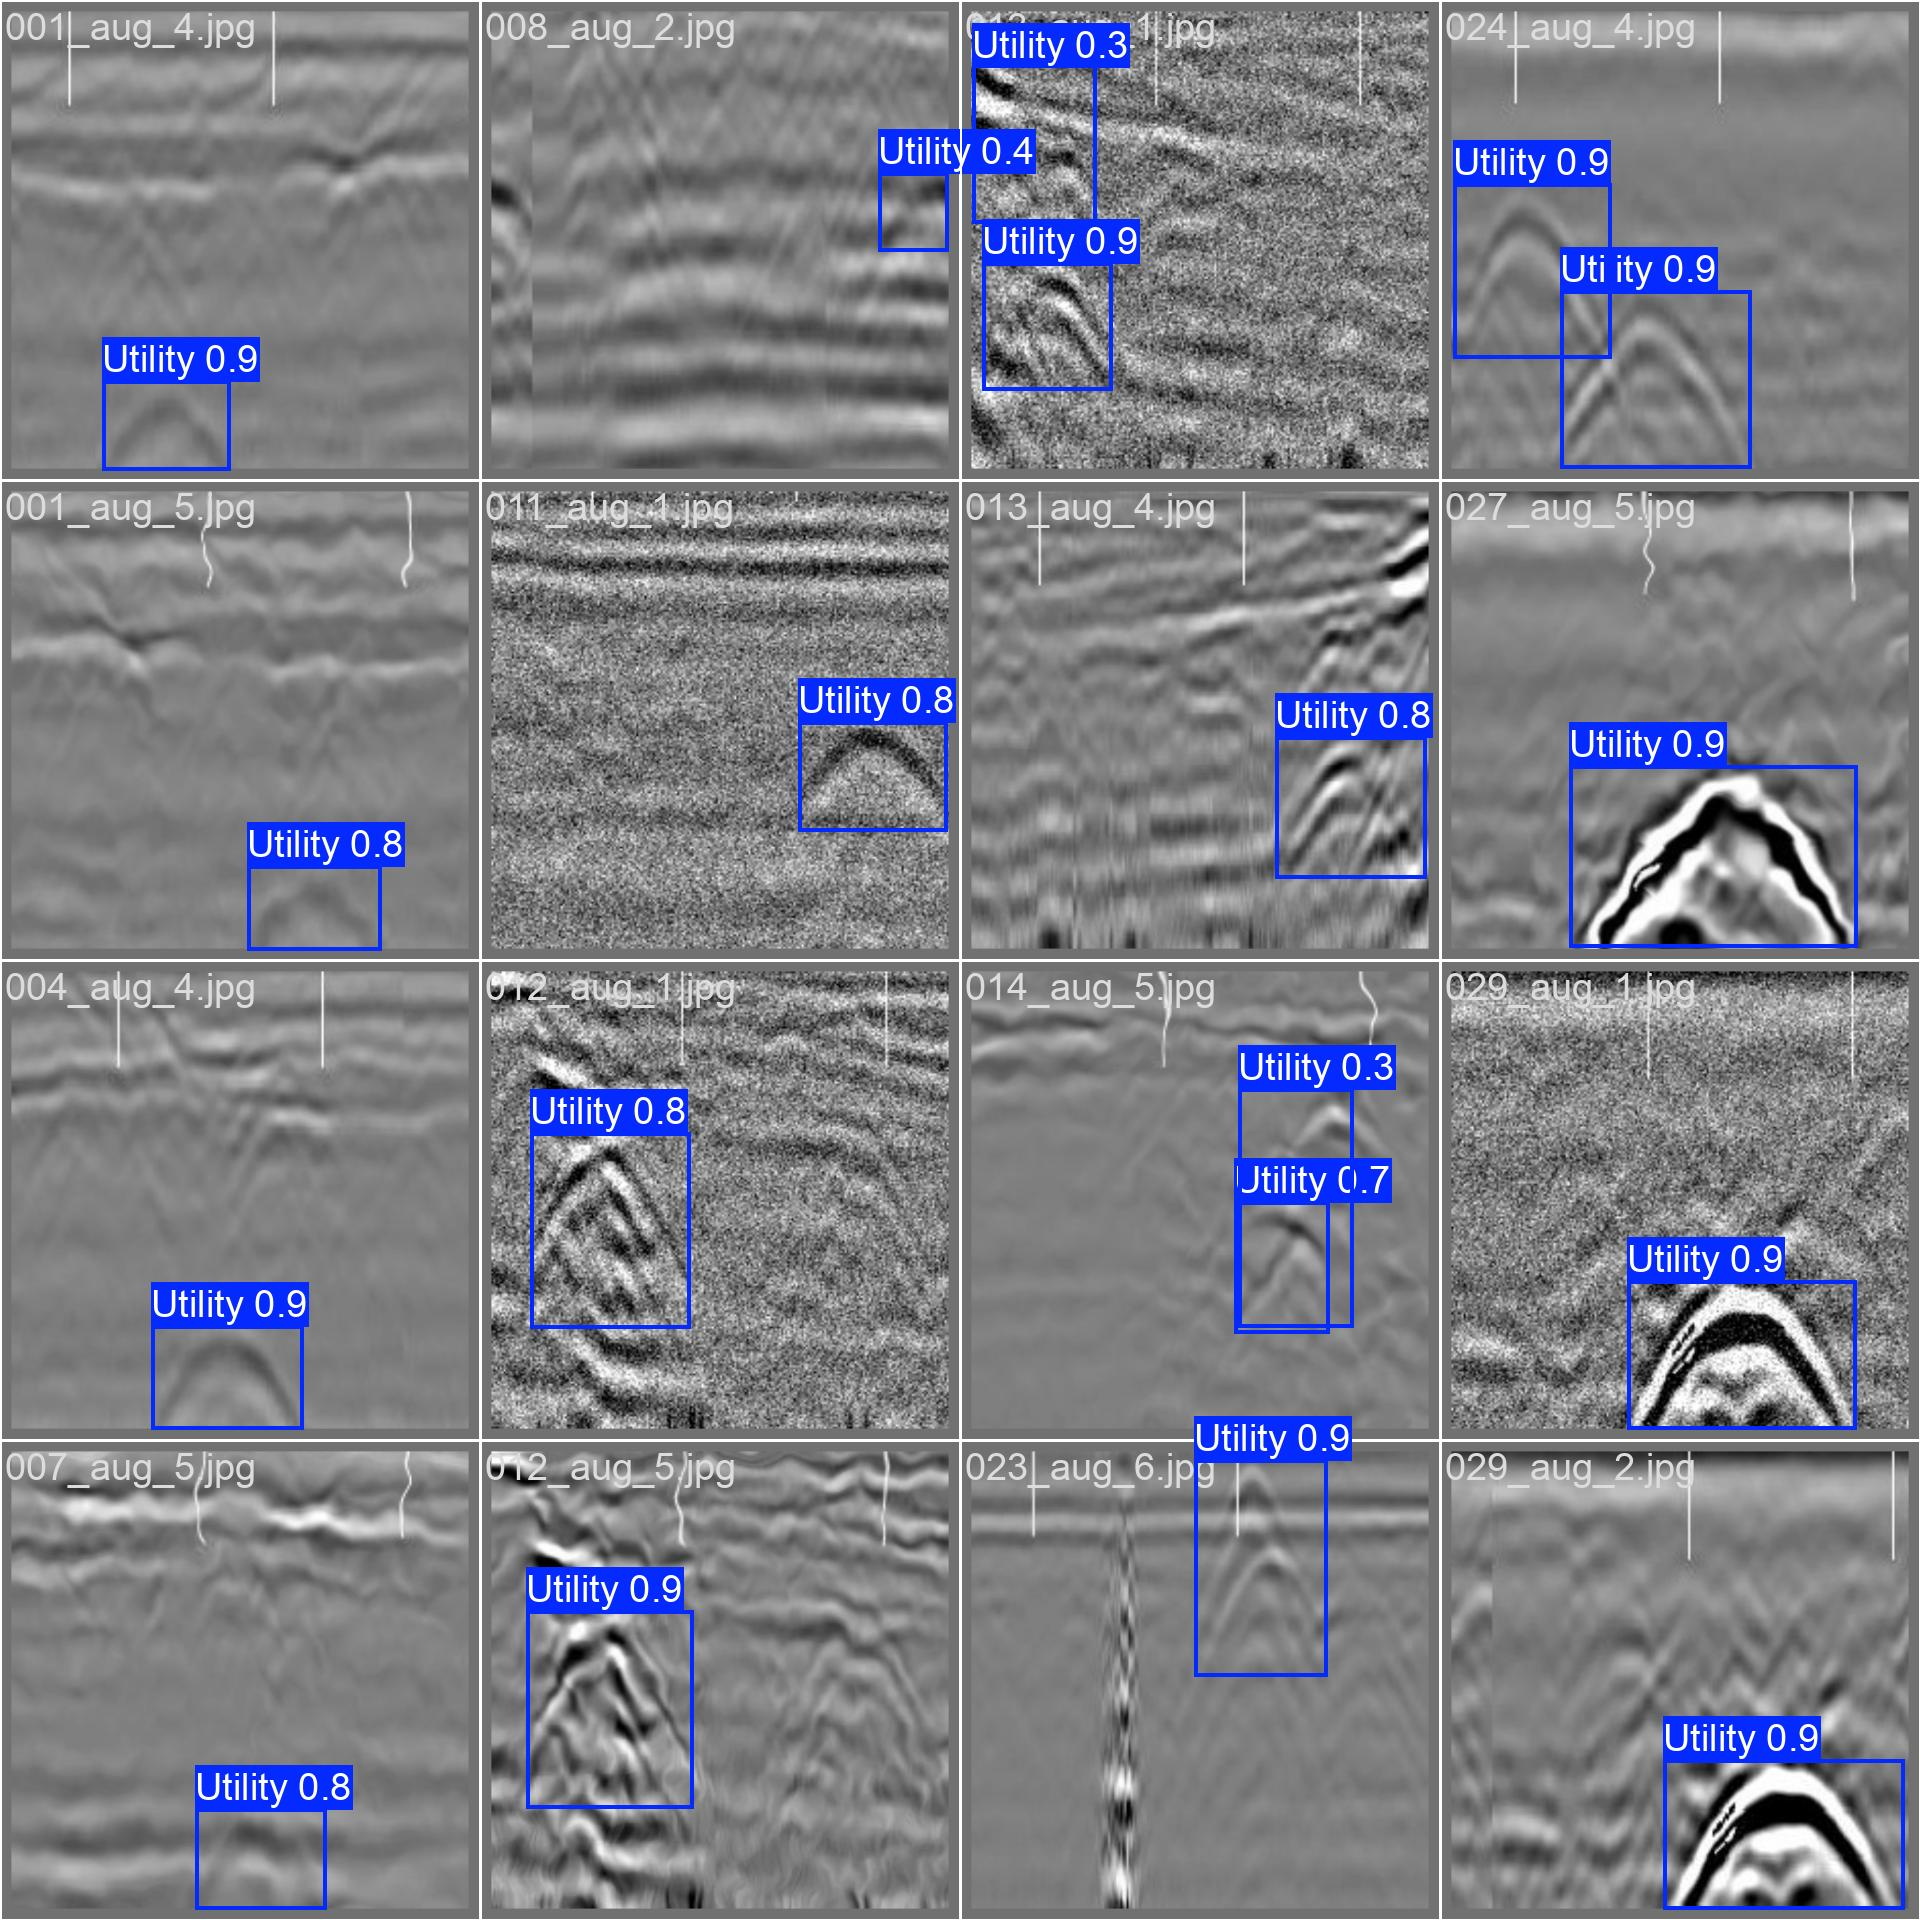

In [ ]:
#MODELİN TAHMİN YAPTIĞI RESİMLER

from IPython.display import Image, display
import os

# Modelin tahmin yaptığı örnek resimlerden birini göster
print("👀 İşte Modelinin Gördükleri (Sol: Gerçek, Sağ: Tahmin):")

# Eğitim sırasında kaydedilen doğrulama görseli
val_img_path = '/content/runs/detect/GPR_Proje_Sonuc/val_batch0_pred.jpg'

if os.path.exists(val_img_path):
    display(Image(filename=val_img_path, width=800))
else:
    print("Resim bulunamadı, klasör yolunu kontrol et.")

In [1]:
# BU KOD İLE TEST EDİLMİŞ RESİMLERDEN RASTGELE BİR ÇIKTIYI GÖSTERECEK

import random
import os
from ultralytics import YOLO
from IPython.display import Image, display

# 1. Modeli Yükle
model = YOLO('/content/runs/detect/GPR_Proje_Sonuc/weights/best.pt')

# 2. Test klasöründen rastgele bir resim seç
test_images_dir = '/content/dataset/test/images'
all_test_images = os.listdir(test_images_dir)
random_image = random.choice(all_test_images)
image_path = os.path.join(test_images_dir, random_image)

print(f"🎲 Seçilen Rastgele Resim: {random_image}")

# 3. Tahmin Yap
results = model.predict(source=image_path, save=True, conf=0.25)

# 4. Sonucu Bul ve Göster
predict_dirs = [d for d in os.listdir('runs/detect') if 'predict' in d]
predict_dirs.sort(key=lambda x: os.path.getmtime(os.path.join('runs/detect', x)))
latest_dir = predict_dirs[-1]
result_path = os.path.join('runs/detect', latest_dir, random_image)

display(Image(filename=result_path, width=800))

ModuleNotFoundError: No module named 'ultralytics'

🔎 Analiz edilen gerçek dosya: 125_aug_1.jpg

image 1/1 /content/dataset/test/images/125_aug_1.jpg: 640x640 4 Utilitys, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict36

🎯 Sadece ID=[0, 1] olanlar aranıyor...


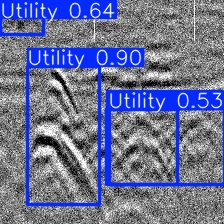

In [ ]:
#BU KOD İLE TEST EDİLMİŞ RESİMLERDEN İSTENİLEN TÜRDEKİ RASTGELE BİR ÇIKTIYI GÖSTERECEK

import os
import random
from ultralytics import YOLO
from IPython.display import Image, display

# 1. Modeli Yükle
model_path = '/content/runs/detect/GPR_Proje_Sonuc/weights/best.pt'
model = YOLO(model_path)

# 2. Test Klasöründen GERÇEK Bir Resim Bul
test_folder = '/content/dataset/test/images'

# Klasördeki tüm dosyaları listele
tum_resimler = [f for f in os.listdir(test_folder) if f.endswith('.jpg')]

# Rastgele bir tane seç (Hata almamak için)
secilen_resim = random.choice(tum_resimler)
resim_yolu = os.path.join(test_folder, secilen_resim)

print(f"🔎 Analiz edilen gerçek dosya: {secilen_resim}")

# 3. TAHMİN YAP (Sınıf Filtresiyle)
# classes=[0] -> Sadece Utility (Boru)
# classes=[1] -> Sadece Cavity (Boşluk)
# Aşağıdaki rakamı değiştirerek deneyebilirsin:
aranan_id = [0,1]

results = model.predict(
    source=resim_yolu,
    save=True,
    conf=0.25,
    classes=aranan_id  # <-- İŞTE FİLTRE BURADA
)

# 4. Sonucu Ekrana Bas
predict_dirs = [d for d in os.listdir('runs/detect') if 'predict' in d]
predict_dirs.sort(key=lambda x: os.path.getmtime(os.path.join('runs/detect', x)))
latest_dir = predict_dirs[-1]
result_path = os.path.join('runs/detect', latest_dir, secilen_resim)

print(f"\n🎯 Sadece ID={aranan_id} olanlar aranıyor...")
display(Image(filename=result_path, width=800))

📉 Karışıklık Matrisi (Confusion Matrix):


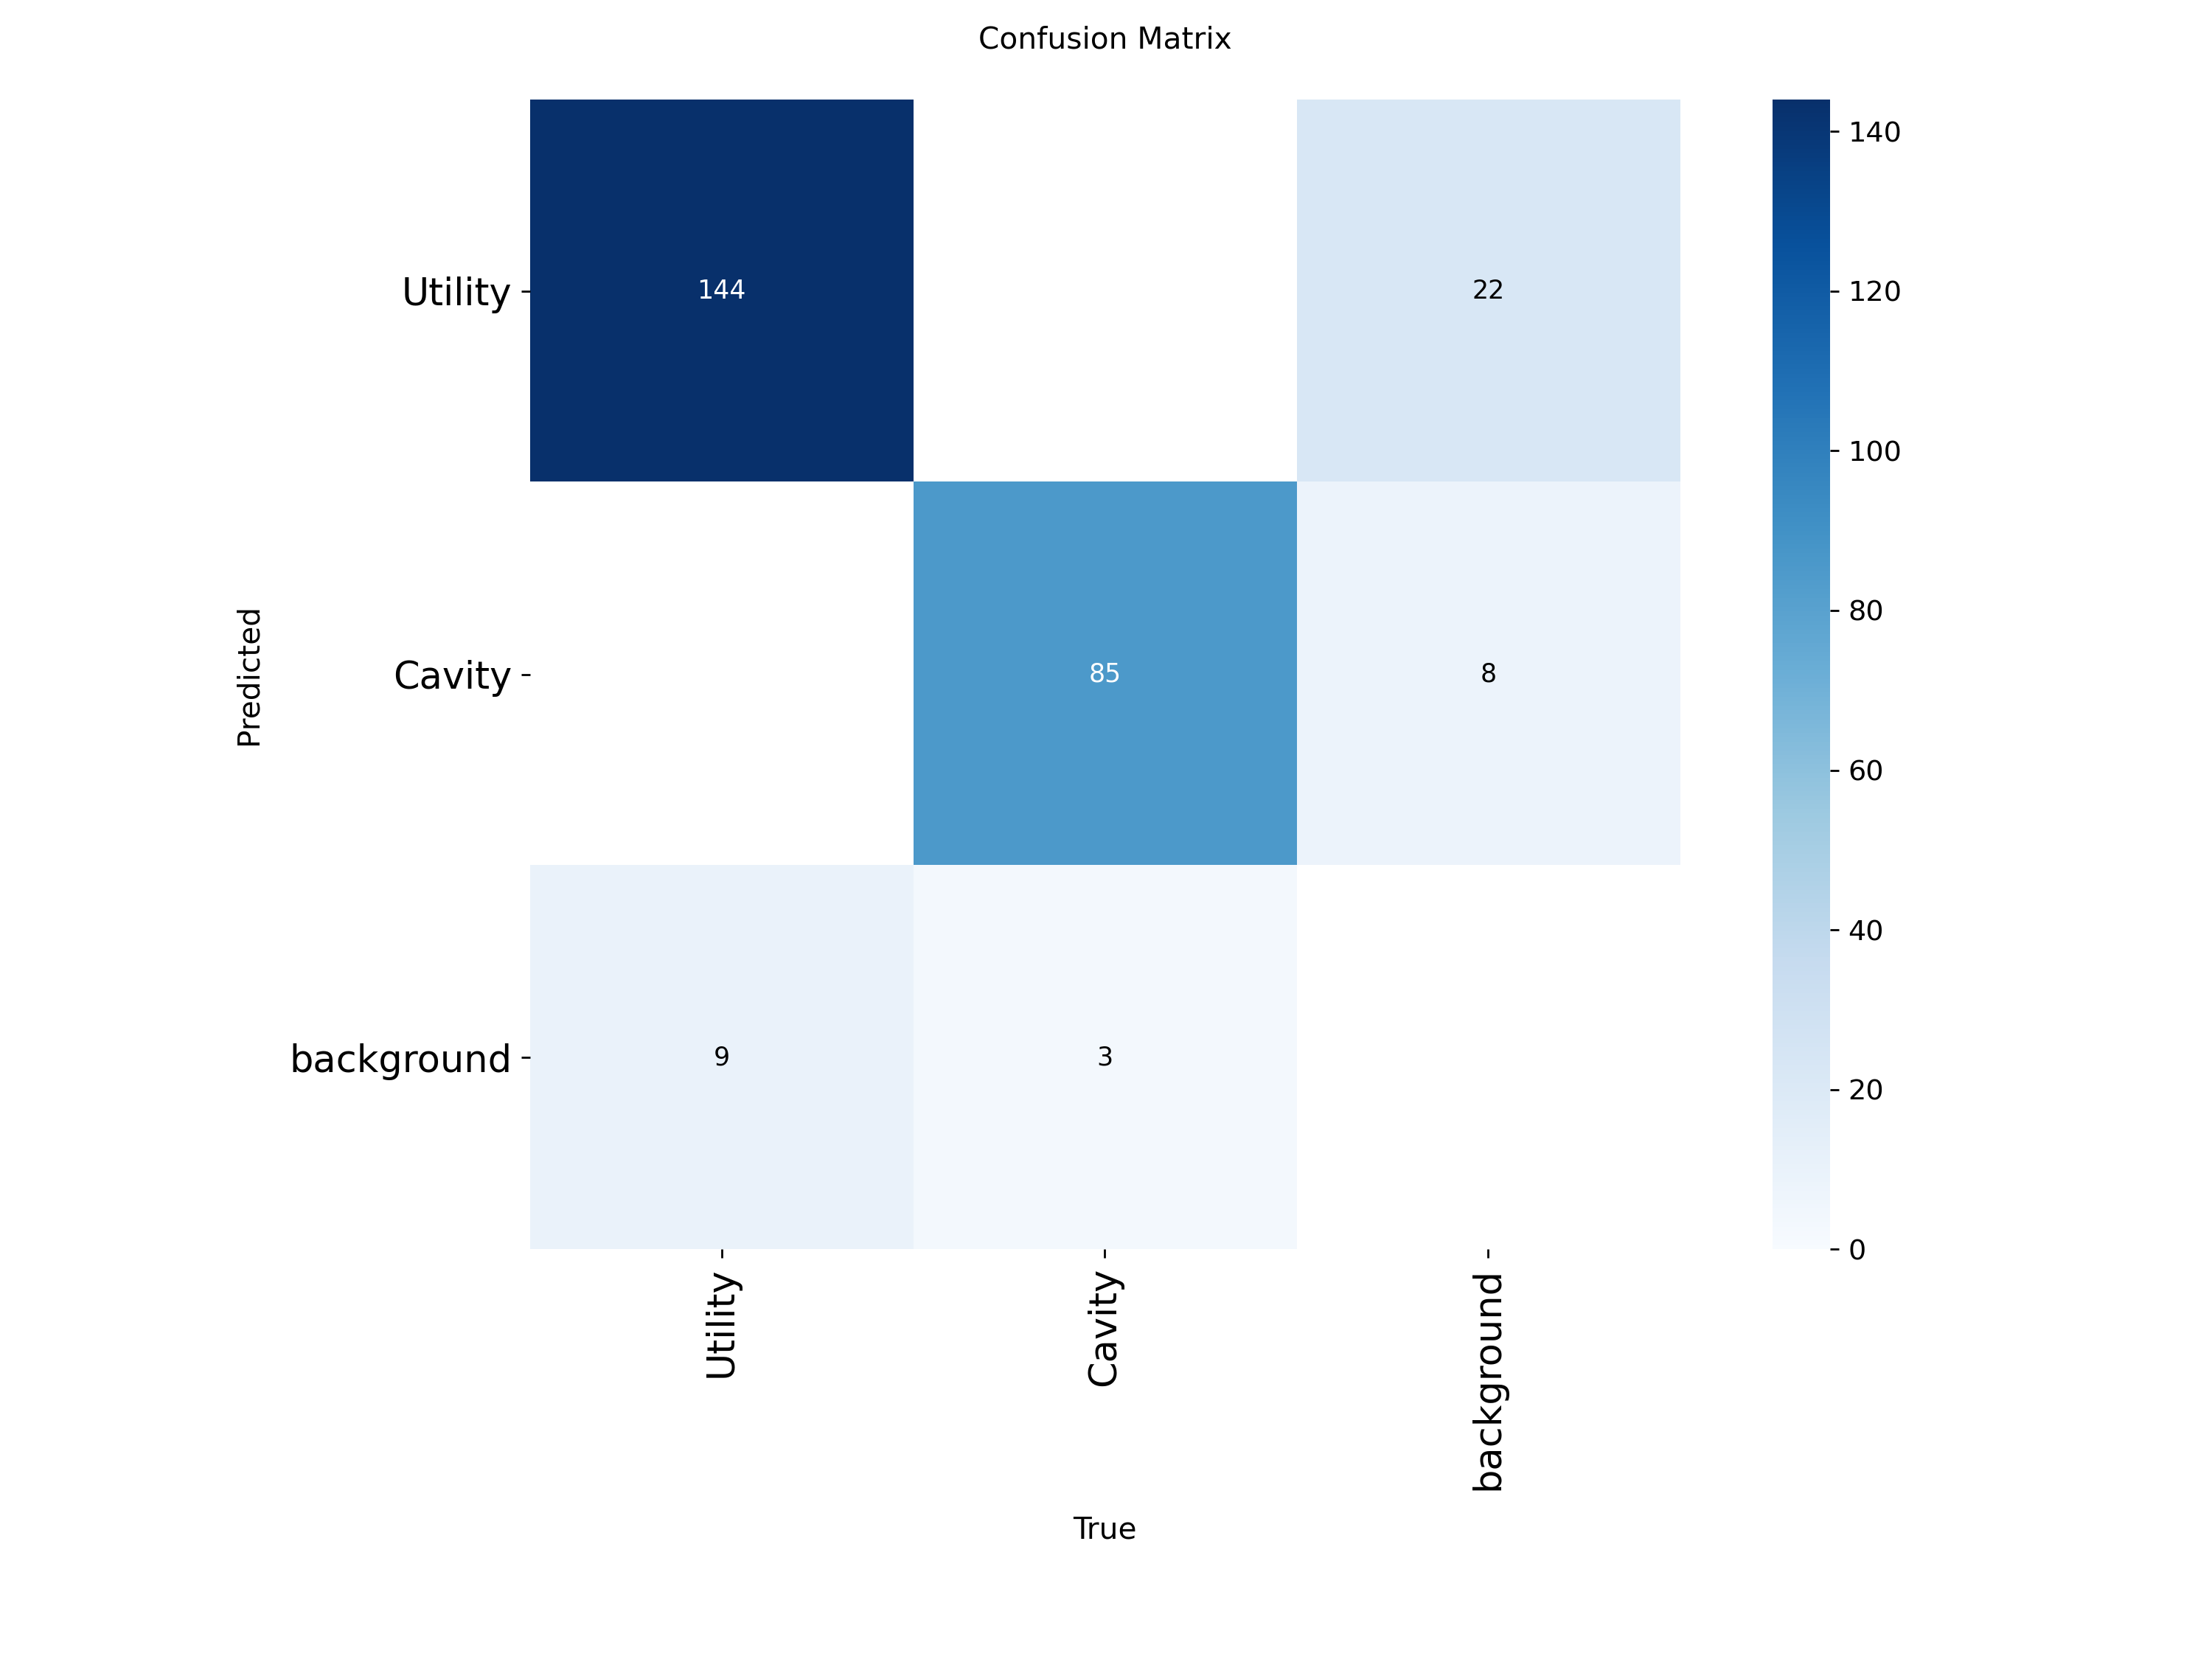

In [ ]:
# HANGİ RESİMDEN KAÇAR ADET TARAMA YAPTI

from IPython.display import Image, display

# Confusion Matrix dosyasını göster
print("📉 Karışıklık Matrisi (Confusion Matrix):")
display(Image(filename='/content/runs/detect/GPR_Proje_Sonuc/confusion_matrix.png', width=800))

📊 Eğitim Performans Grafikleri:


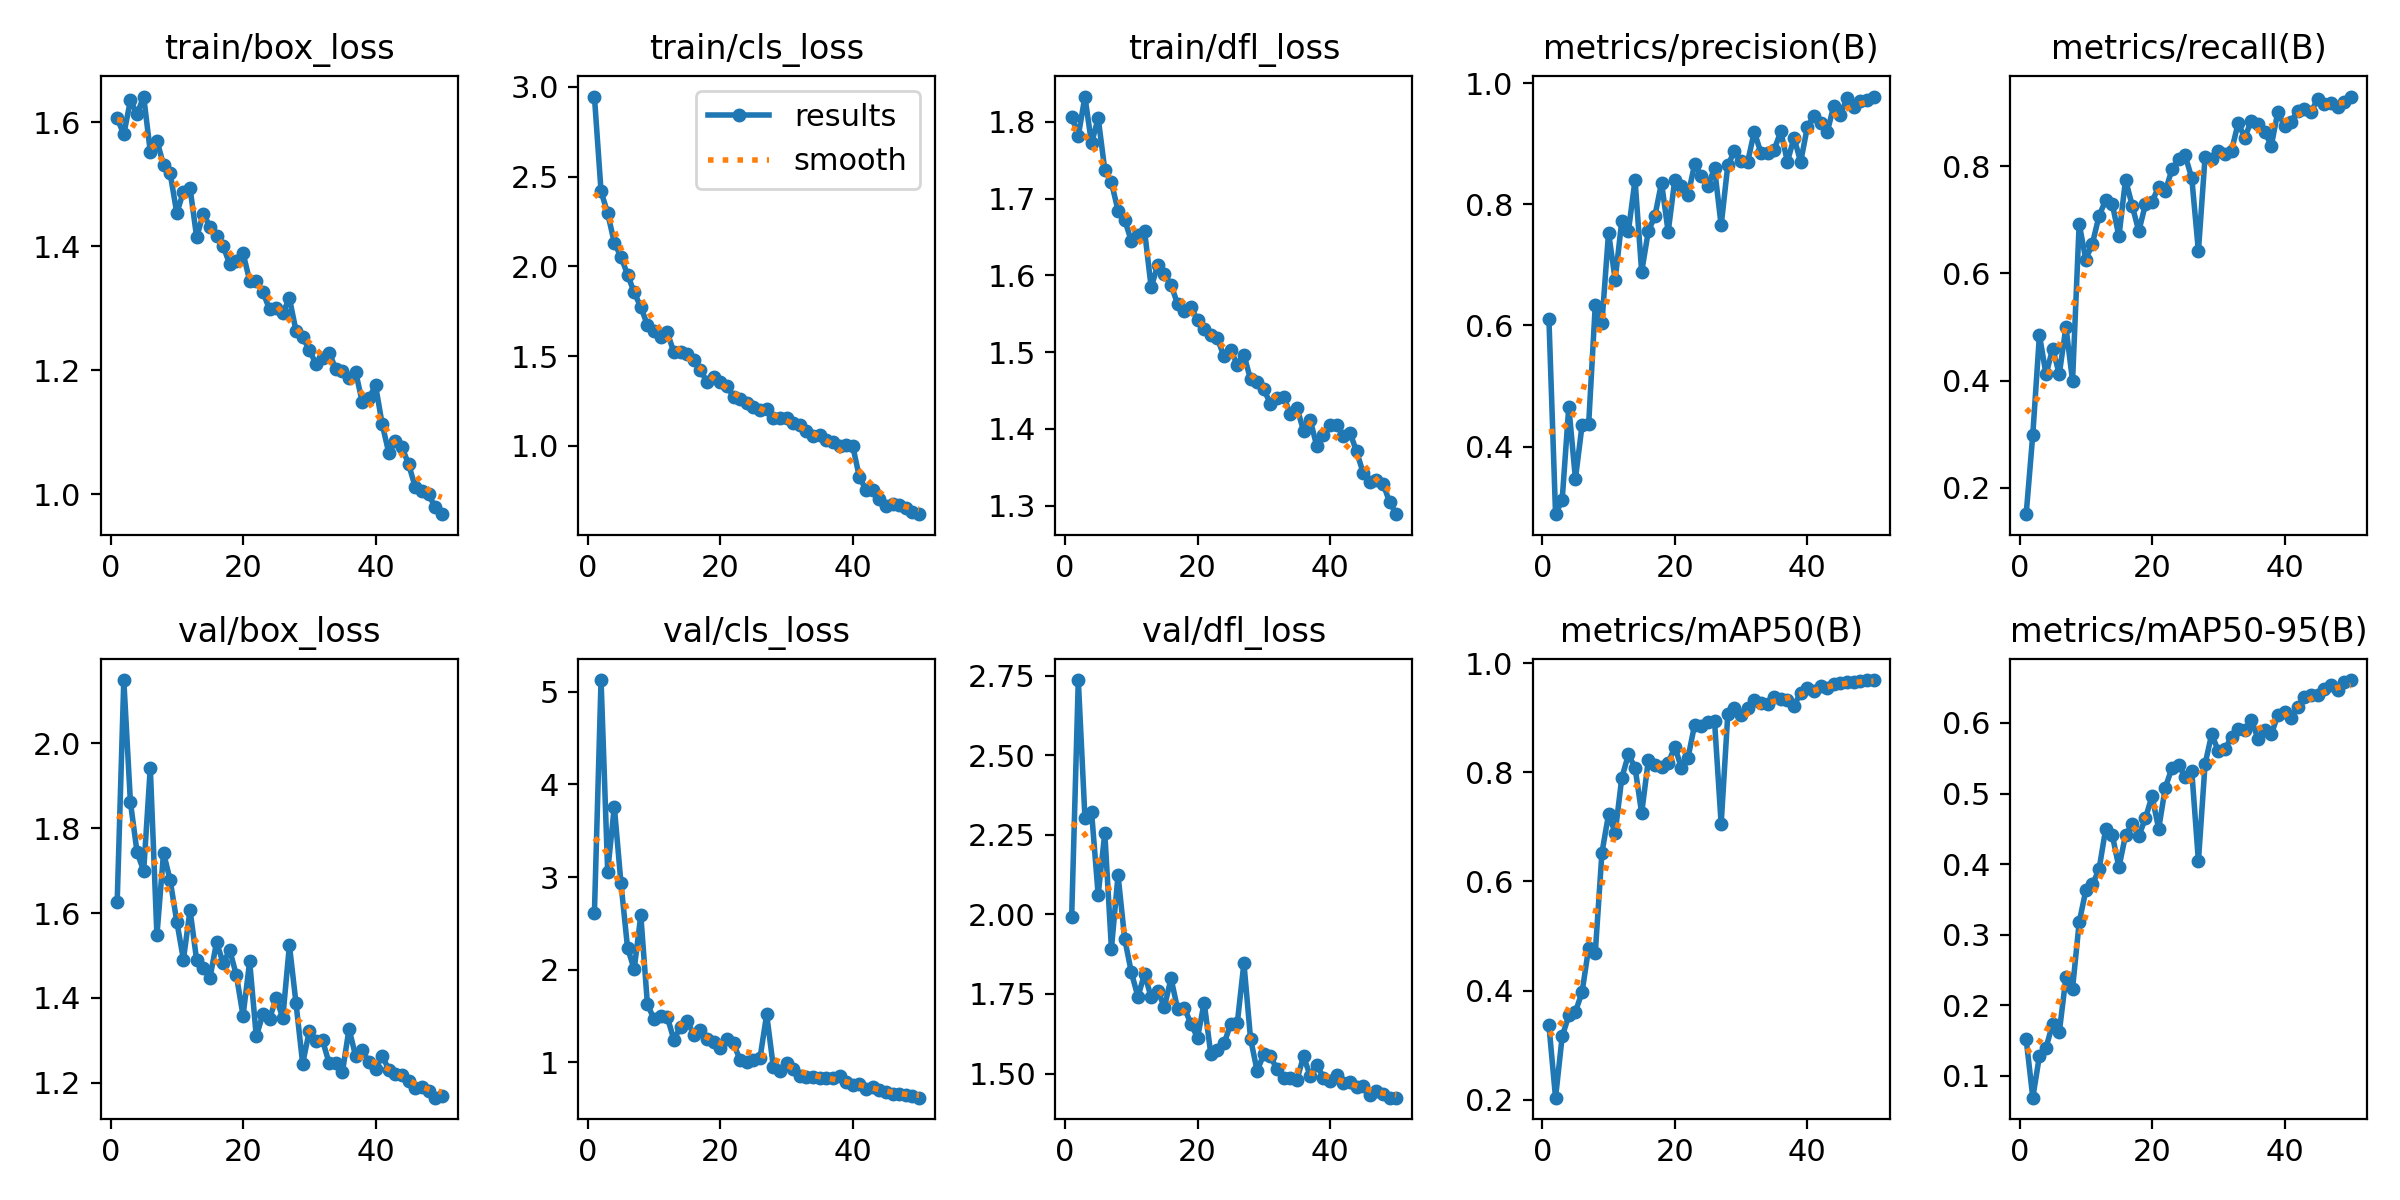

In [ ]:
print("📊 Eğitim Performans Grafikleri:")
display(Image(filename='/content/runs/detect/GPR_Proje_Sonuc/results.png', width=1000))


🔎 İncelenen Resim: 007_aug_3.jpg

image 1/1 /content/dataset/test/images/007_aug_3.jpg: 640x640 1 Utility, 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict38


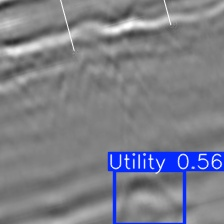


🔎 İncelenen Resim: 41_aug_8.jpg

image 1/1 /content/dataset/test/images/41_aug_8.jpg: 640x640 2 Cavitys, 7.4ms
Speed: 3.7ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict38


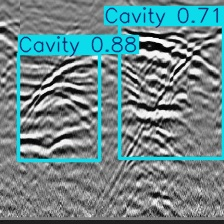


🔎 İncelenen Resim: 240_aug_6.jpg

image 1/1 /content/dataset/test/images/240_aug_6.jpg: 640x640 2 Utilitys, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict38


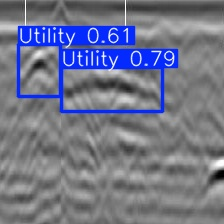


🔎 İncelenen Resim: 091_aug_4.jpg

image 1/1 /content/dataset/test/images/091_aug_4.jpg: 640x640 2 Utilitys, 8.4ms
Speed: 4.0ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict38


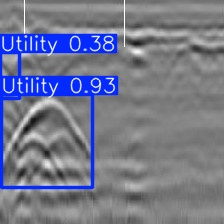


🔎 İncelenen Resim: 155_aug_4.jpg

image 1/1 /content/dataset/test/images/155_aug_4.jpg: 640x640 2 Utilitys, 9.3ms
Speed: 3.3ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict38


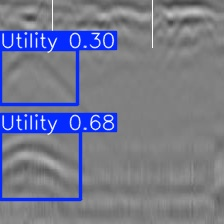


🔎 İncelenen Resim: 66_aug_10.jpg

image 1/1 /content/dataset/test/images/66_aug_10.jpg: 640x640 1 Cavity, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict38


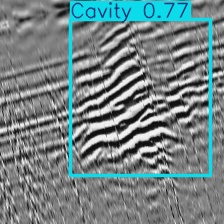

In [ ]:
#BU KOD İLE AYNI ANDA BELLİ MİKTARDA FARKLI RESMİ GÖREBİLMEMİZİ SAĞLAR

import os
import random
from ultralytics import YOLO
from IPython.display import Image, display

# Modeli Yükle
model = YOLO('/content/runs/detect/GPR_Proje_Sonuc/weights/best.pt')

# Test klasöründen rastgele 3 resim seç
test_dir = '/content/dataset/test/images'
test_images = random.sample(os.listdir(test_dir), 6)

for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    print(f"\n🔎 İncelenen Resim: {img_name}")

    # Tahmin Yap
    model.predict(source=img_path, save=True, conf=0.25)

    # Sonucu Göster
    # En son tahmin klasörünü bul
    predict_dirs = [d for d in os.listdir('runs/detect') if 'predict' in d]
    predict_dirs.sort(key=lambda x: os.path.getmtime(os.path.join('runs/detect', x)))
    latest_dir = predict_dirs[-1]

    display(Image(filename=os.path.join('runs/detect', latest_dir, img_name), width=600))

In [ ]:
from google.colab import files
import os

print("📂 Lütfen aşağıda açılacak butona bas ve 'dataset.zip' dosyasını seç:")

# Dosya yükleme penceresini açar
uploaded = files.upload()

# Yükleme bitince teyit et
if 'dataset.zip' in uploaded:
    print("\n✅ Harika! dataset.zip başarıyla yüklendi.")
    print("Şimdi bir önceki 'Tamir ve Final Kodu'nu tekrar çalıştırabilirsin.")
else:
    print("\n❌ Bir aksilik oldu, dosya seçilmedi.")

📂 Lütfen aşağıda açılacak butona bas ve 'dataset.zip' dosyasını seç:


Saving dataset.zip to dataset.zip

✅ Harika! dataset.zip başarıyla yüklendi.
Şimdi bir önceki 'Tamir ve Final Kodu'nu tekrar çalıştırabilirsin.


In [ ]:
# EĞİTİMDEN SONRA TEST İÇİN AYRILMIŞ VERİLER İLE YAPTIĞIMIZ TEST KODU

import os
import shutil
import yaml
from ultralytics import YOLO

# --- 1. KURULUM VE HAZIRLIK ---
print("🔧 Sistem Hazırlanıyor...")
try:
    import ultralytics
except ImportError:
    !pip install ultralytics
    import ultralytics

# dataset.zip kontrolü
if not os.path.exists('dataset.zip') and not os.path.exists('/content/dataset'):
    print("❌ dataset.zip bulunamadı! Lütfen sol menüye sürükleyip bırakın.")
else:
    # Zip varsa ve klasör yoksa çıkar
    if os.path.exists('dataset.zip') and not os.path.exists('/content/dataset'):
        print("📦 Veri seti açılıyor...")
        !unzip -q dataset.zip -d /content/

        # Klasör adı düzeltmesi (Gerekirse)
        if not os.path.exists('/content/dataset') and os.path.exists('/content/content/dataset'):
             shutil.move('/content/content/dataset', '/content/dataset')

    # data.yaml dosyasını oluştur
    yaml_content = {
        'path': '/content/dataset',
        'train': 'train/images',
        'val': 'val/images',
        'test': 'test/images',
        'nc': 2,
        'names': ['Utility', 'Cavity']
    }

    os.makedirs('/content/dataset', exist_ok=True)
    with open('/content/dataset/data.yaml', 'w') as f:
        yaml.dump(yaml_content, f)

    # --- 2. HIZLI EĞİTİM (Tekrar) ---
    print("\n🚀 EĞİTİM TEKRAR BAŞLIYOR (Merak etme hızlı biter)...")
    model = YOLO('yolov8n.pt')

    # Modeli Eğit
    model.train(
        data='/content/dataset/data.yaml',
        epochs=50,
        imgsz=640,
        batch=16,
        name='GPR_Proje_Sonuc', # Aynı isimle kaydedelim
        patience=10,
        exist_ok=True # Varsa üzerine yaz
    )

    # --- 3. TEST AŞAMASI (FİNAL) ---
    print("\n🎓 EĞİTİM BİTTİ! ŞİMDİ TEST SINAVI BAŞLIYOR...")

    # En iyi modeli yükle
    best_model_path = '/content/runs/detect/GPR_Proje_Sonuc/weights/best.pt'
    final_model = YOLO(best_model_path)

    # Test Seti üzerinde değerlendir
    metrics = final_model.val(
        data='/content/dataset/data.yaml',
        split='test',   # <--- Sadece TEST verisi
        name='GPR_Test_Sonuclari'
    )

    print("\n" + "="*40)
    print("🏆 FİNAL KARNESİ (TEST SONUÇLARI)")
    print("="*40)
    print(f"✅ Genel Başarı (mAP50)    : %{metrics.box.map50 * 100:.2f}")
    print(f"✅ Hassas Başarı (mAP50-95): %{metrics.box.map * 100:.2f}")
    print("="*40)
    print("Bu sonuçlar modelin HİÇ GÖRMEDİĞİ verilerdeki başarısıdır.")

🔧 Sistem Hazırlanıyor...

🚀 EĞİTİM TEKRAR BAŞLIYOR (Merak etme hızlı biter)...
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=GPR_Proje_Sonuc, nbs=64, nms=False, opset=None, optimize=False

📂 Grafikler şu klasörden çekiliyor: /content/runs/detect/GPR_Test_Sonuclari

📉 1. Karışıklık Matrisi (Test Verisi İçin):
(Köşegenler ne kadar koyu maviyse o kadar iyidir)


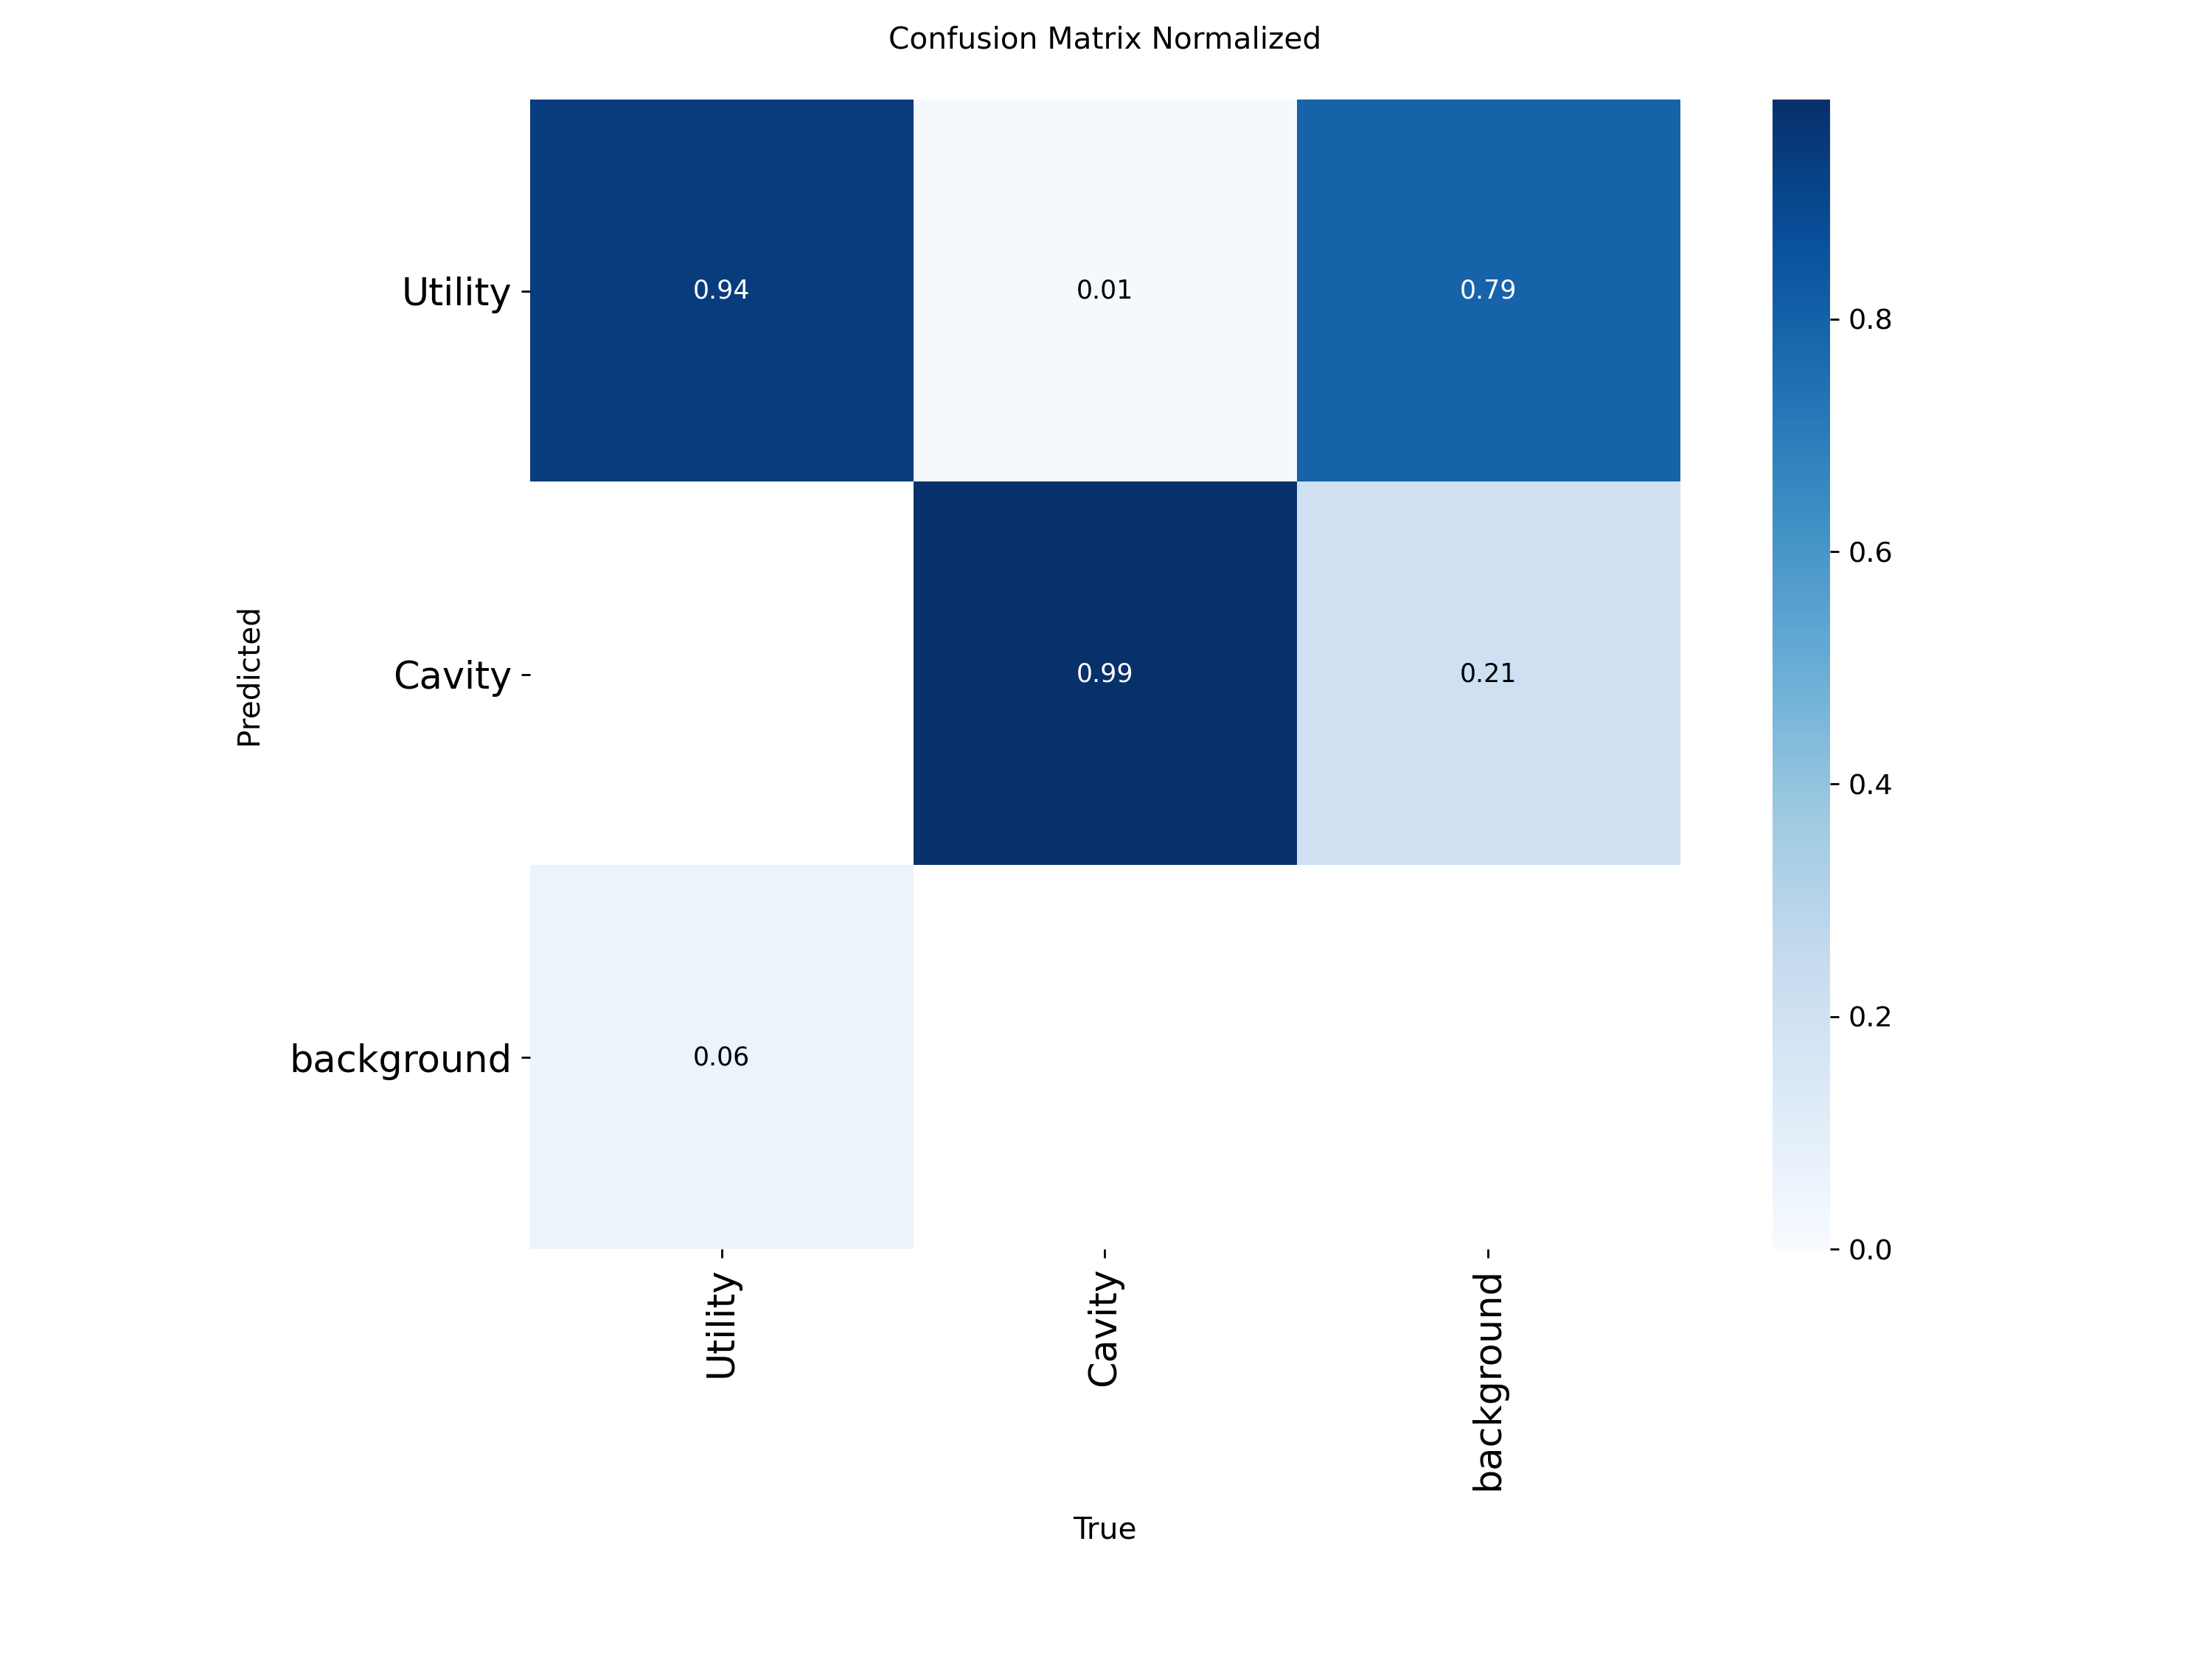


📈 2. Precision-Recall Eğrisi (Genel Başarı):
(Çizgi sağ üst köşeye değiyorsa model %100 demektir)

📊 3. F1 Skor Grafiği:

👀 4. Modelin Gözünden Test Resimleri:
Dosya: val_batch0_pred.jpg


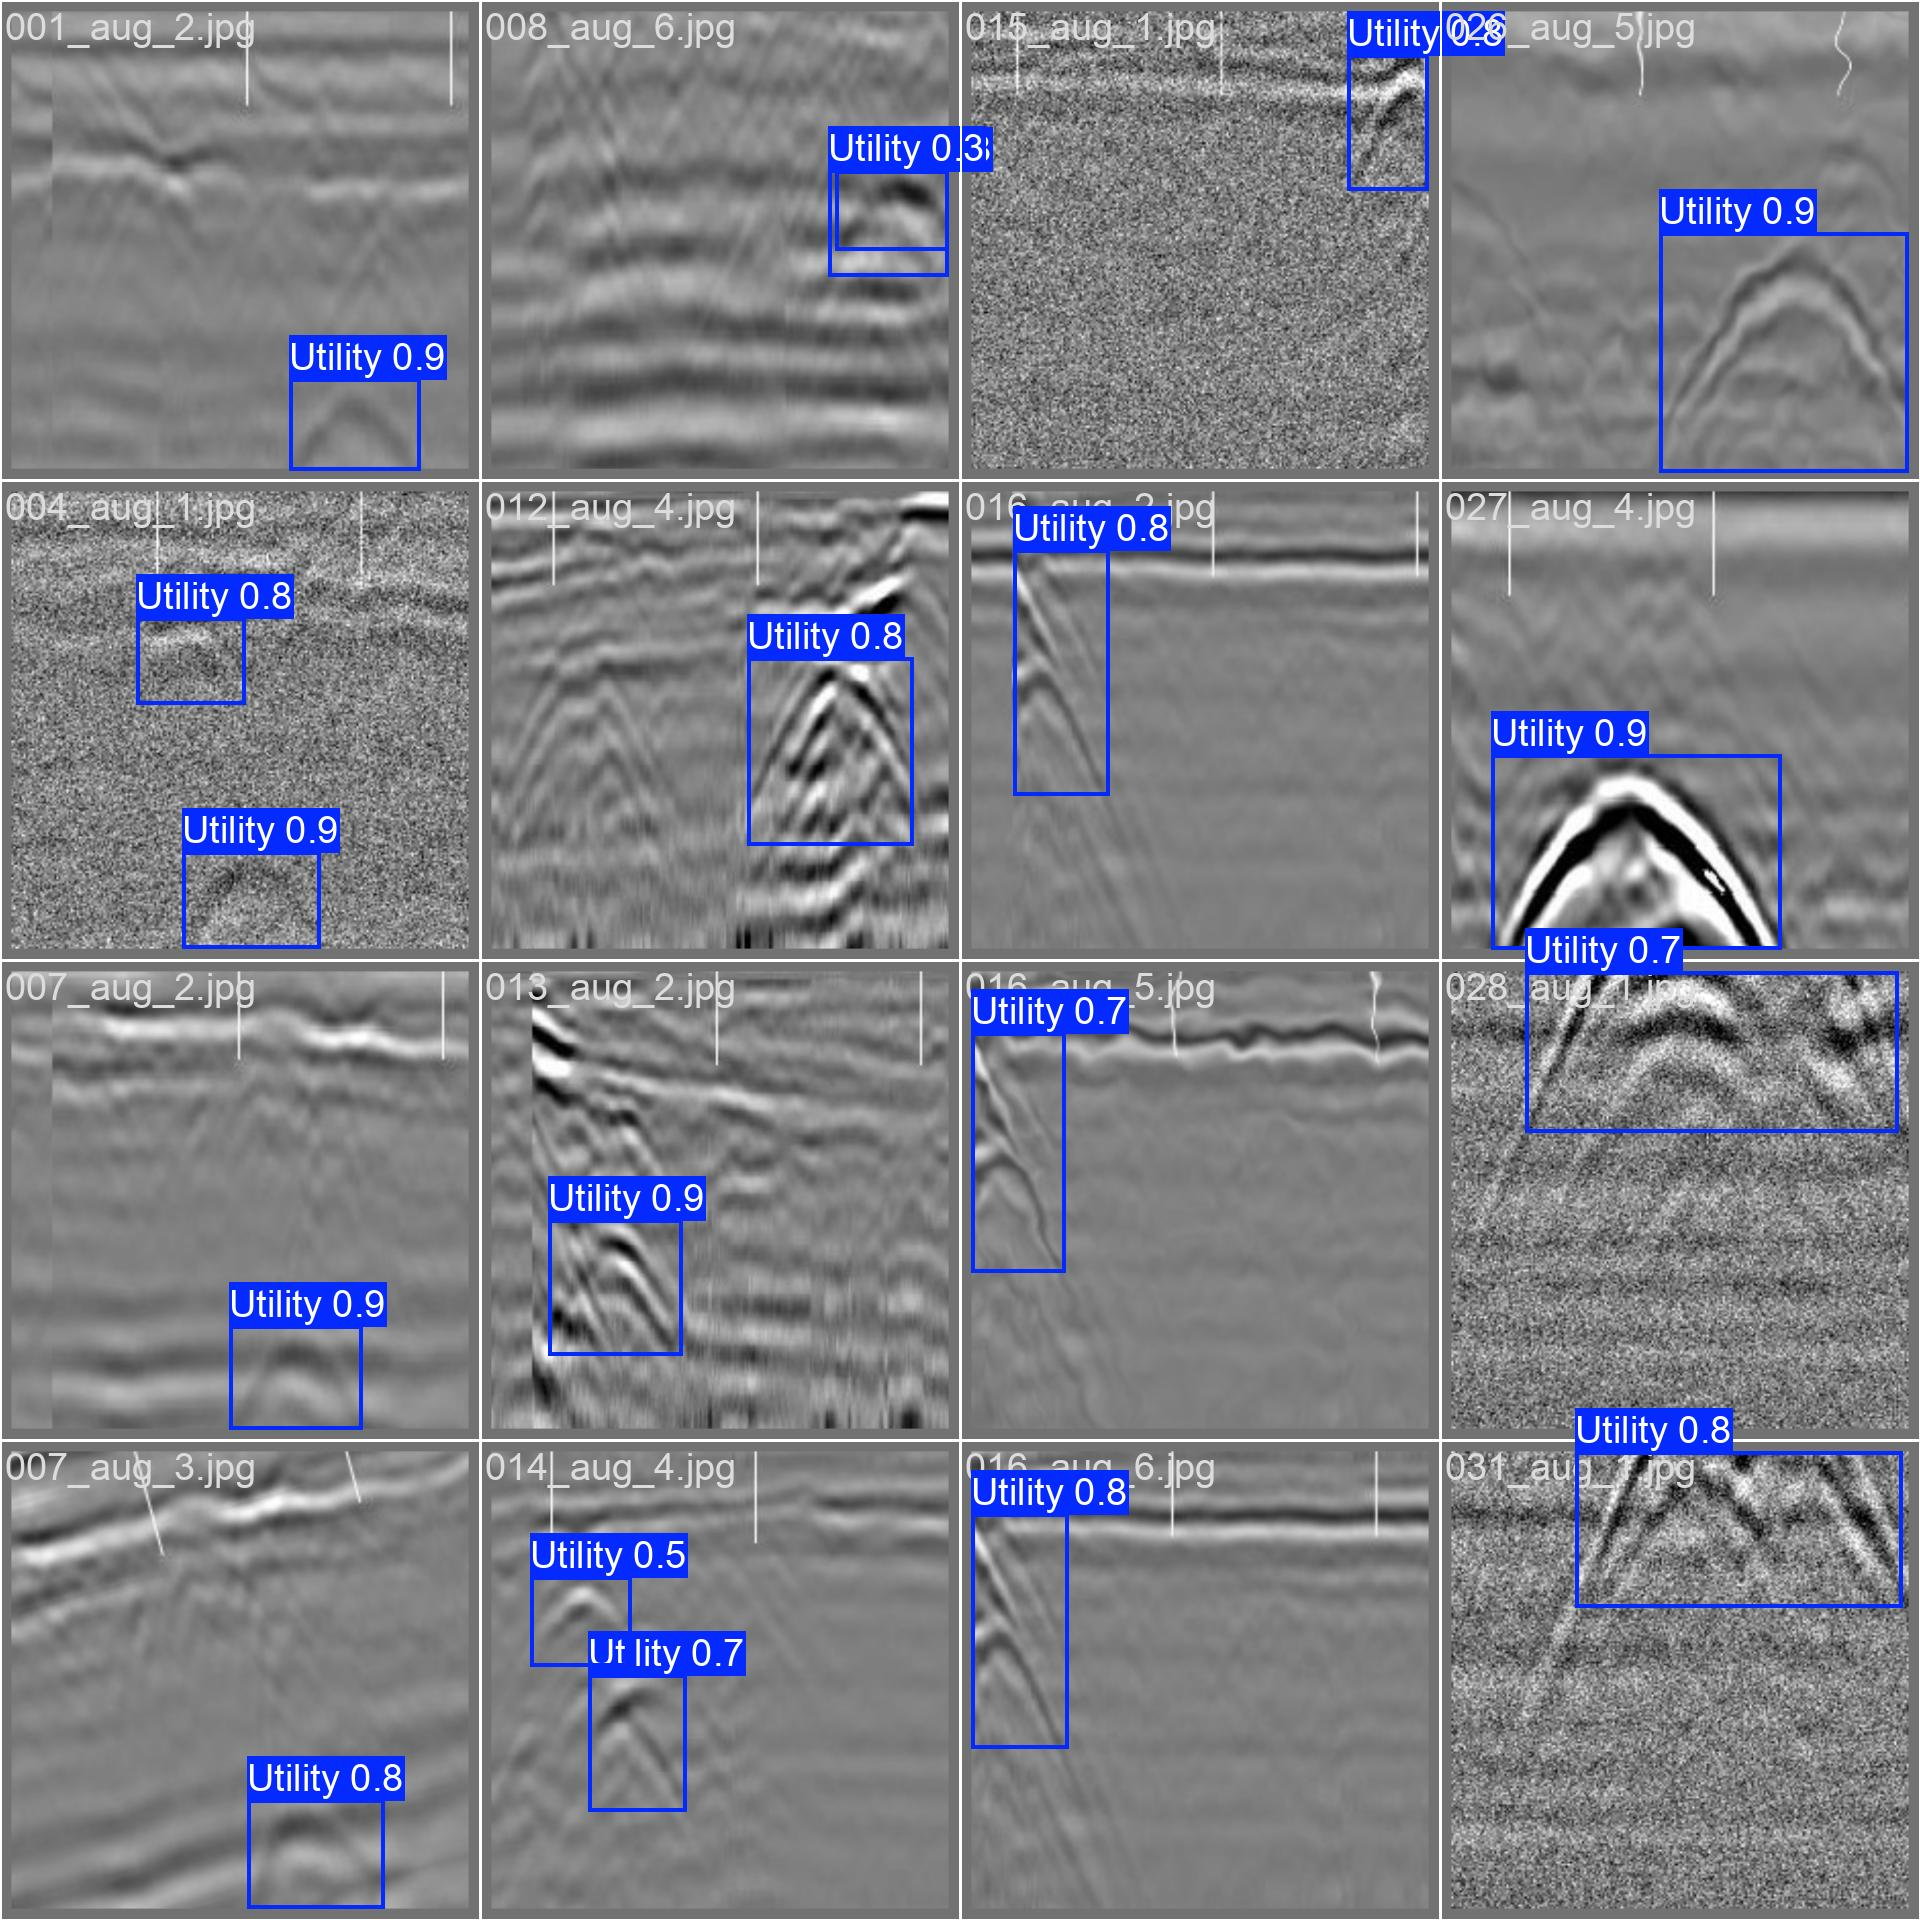

Dosya: val_batch2_pred.jpg


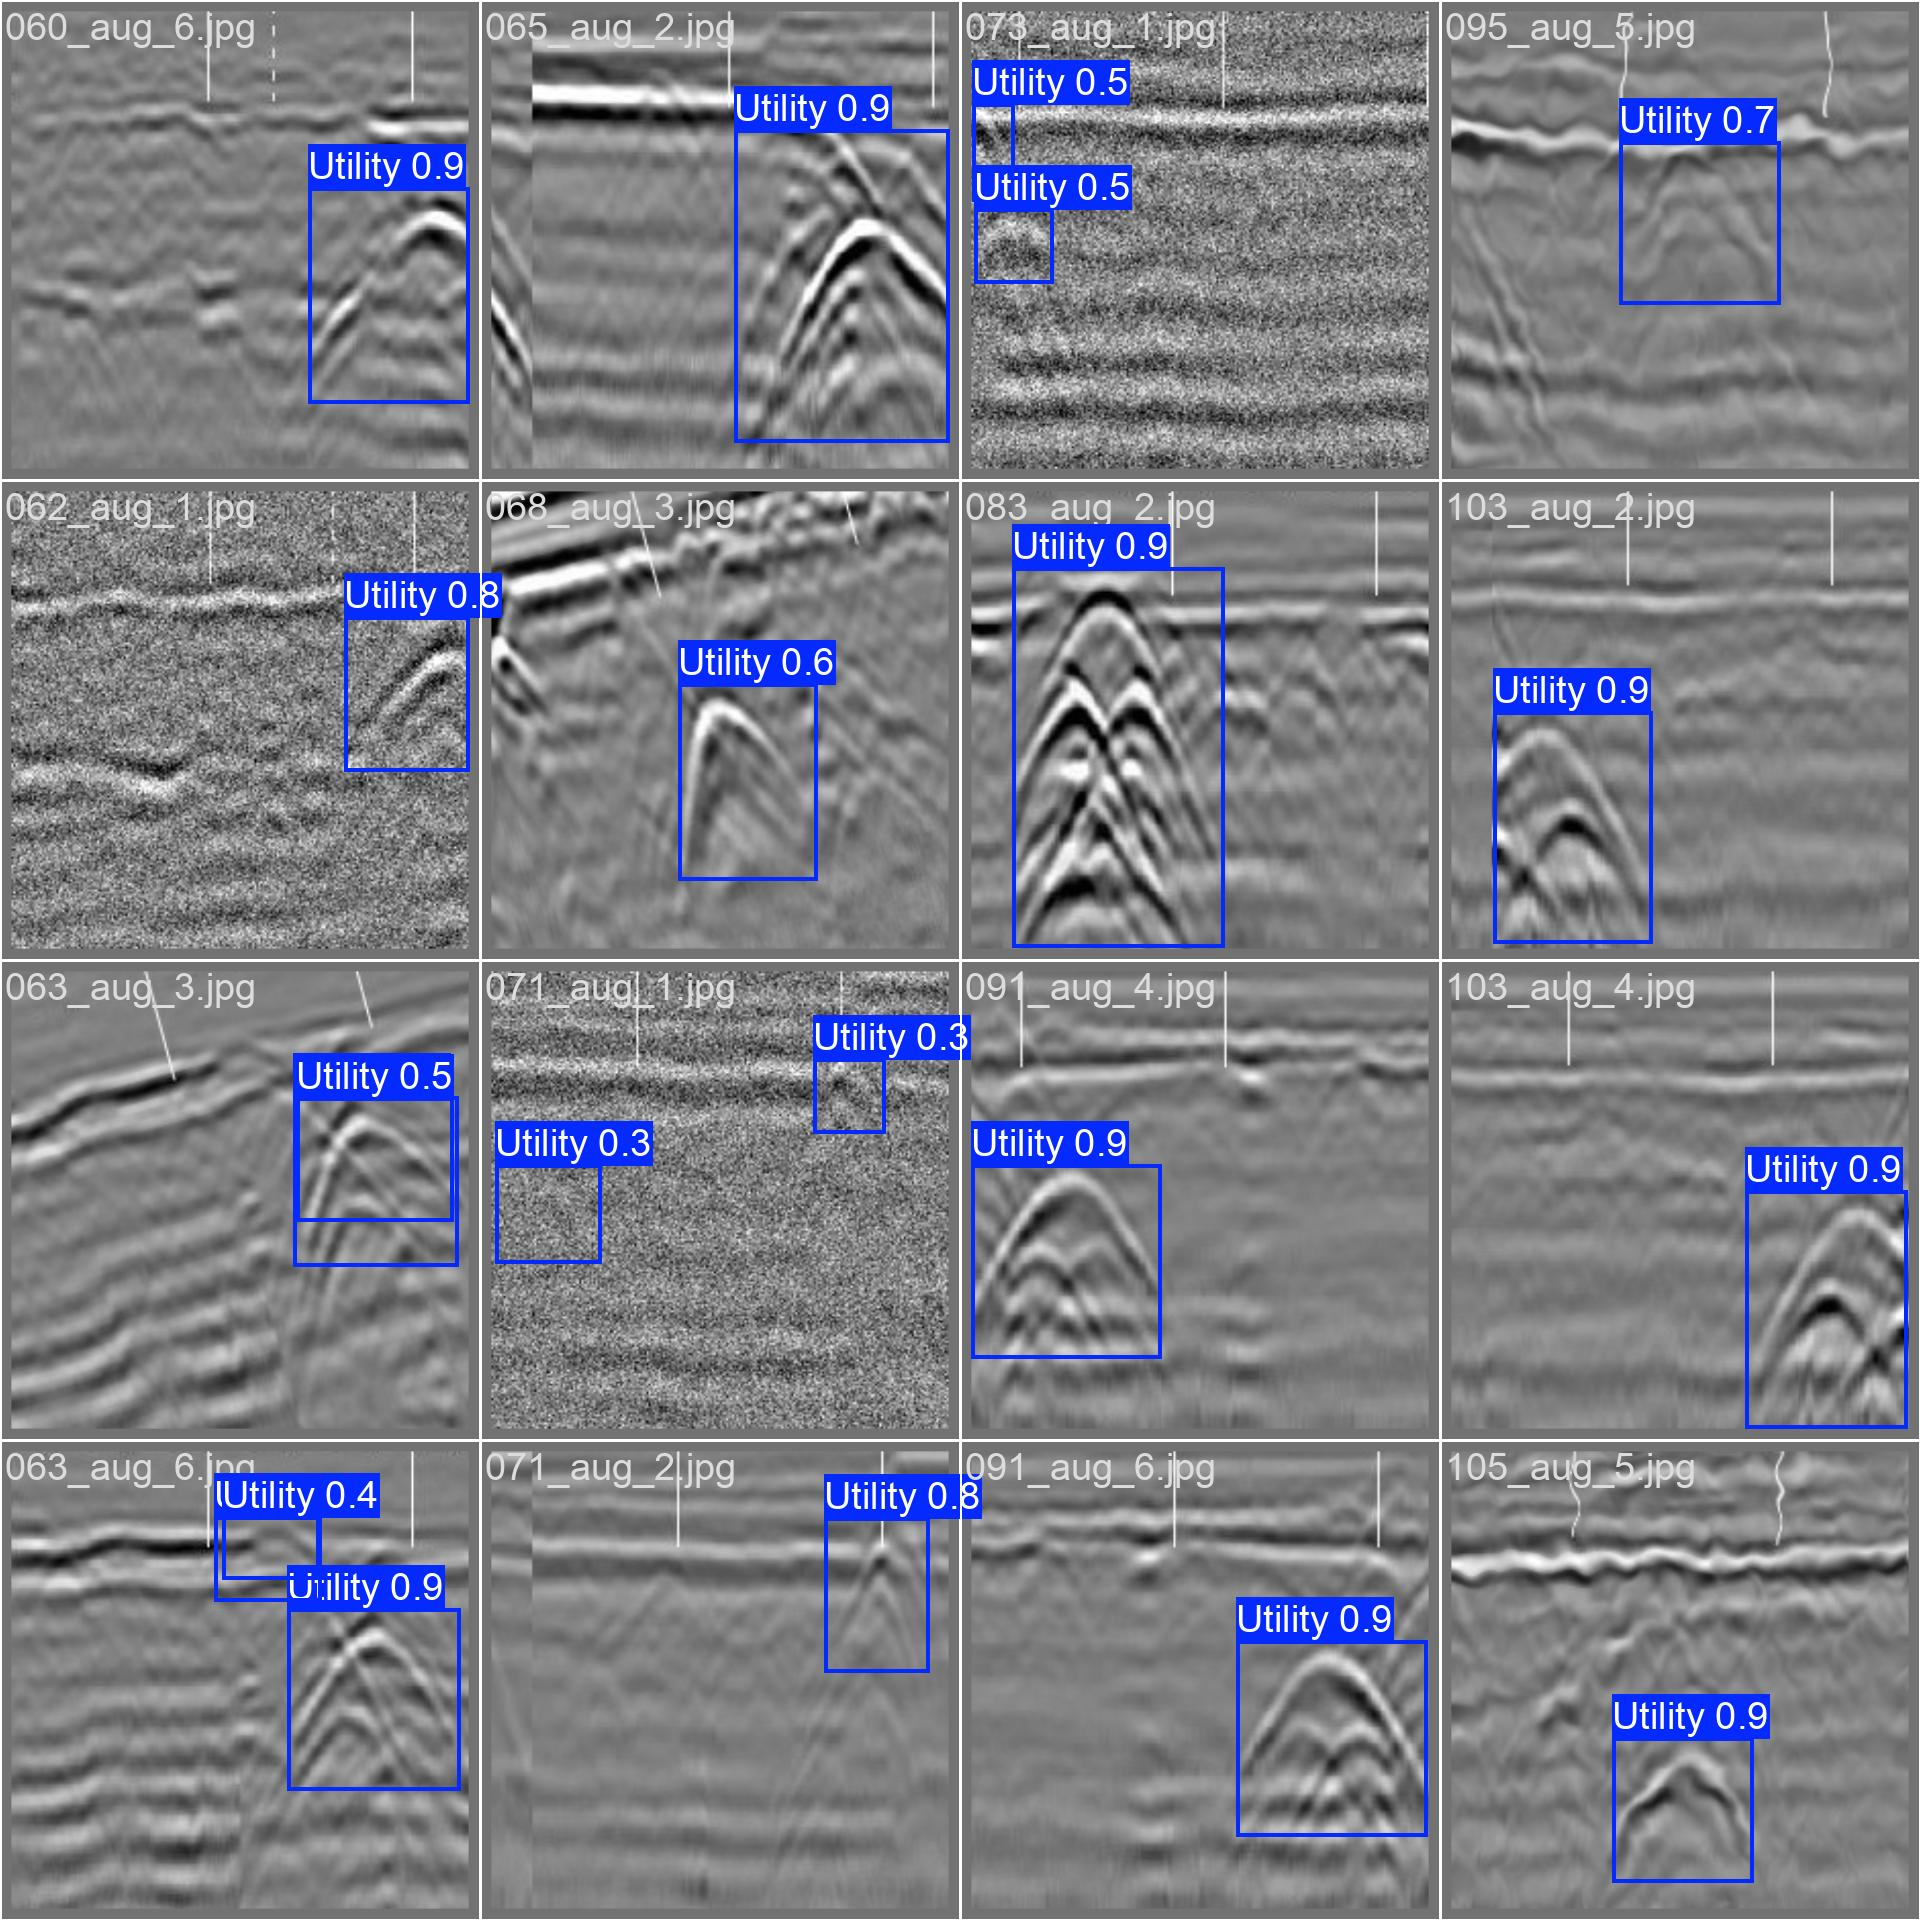

In [ ]:
# GRAFİKLERİ GÖSTERİYORUZ VE RESİMLER RASTGELE OLMAYAN HALİ

from IPython.display import Image, display
import os

# Test sonuçlarının olduğu klasör
test_folder = '/content/runs/detect/GPR_Test_Sonuclari'

print(f"📂 Grafikler şu klasörden çekiliyor: {test_folder}\n")

# 1. TEST KARIŞIKLIK MATRİSİ (Confusion Matrix)
# Modelin test sınavında nerede hata yaptığını gösterir.
cm_path = os.path.join(test_folder, 'confusion_matrix_normalized.png') # Yüzdelik hali daha şıktır
if not os.path.exists(cm_path): # Eğer yüzdelik yoksa normalini al
    cm_path = os.path.join(test_folder, 'confusion_matrix.png')

print("📉 1. Karışıklık Matrisi (Test Verisi İçin):")
print("(Köşegenler ne kadar koyu maviyse o kadar iyidir)")
display(Image(filename=cm_path, width=800))

# 2. PRECISION-RECALL EĞRİSİ (PR Curve)
# Akademik makalelerin vazgeçilmezidir. Çizgi sağ üst köşeye ne kadar yakınsa model o kadar mükemmeldir.
pr_path = os.path.join(test_folder, 'PR_curve.png')
print("\n📈 2. Precision-Recall Eğrisi (Genel Başarı):")
print("(Çizgi sağ üst köşeye değiyorsa model %100 demektir)")
if os.path.exists(pr_path):
    display(Image(filename=pr_path, width=800))

# 3. F1 SKOR EĞRİSİ
# Hata yapmama ile yakalama arasındaki dengeyi gösterir.
f1_path = os.path.join(test_folder, 'F1_curve.png')
print("\n📊 3. F1 Skor Grafiği:")
if os.path.exists(f1_path):
    display(Image(filename=f1_path, width=800))

# 4. GÖRSEL KANITLAR (Tahmin Edilen Resimler)
# Üzerine kutu çizilmiş gerçek test resimleri
print("\n👀 4. Modelin Gözünden Test Resimleri:")
# 'val_batch0_pred.jpg' gibi dosyalar tahminleri içerir
pred_files = [f for f in os.listdir(test_folder) if 'pred' in f]
if len(pred_files) > 0:
    # İlk 2 sayfayı gösterelim
    for f in pred_files[:2]:
        print(f"Dosya: {f}")
        display(Image(filename=os.path.join(test_folder, f), width=900))
else:
    print("Tahmin görselleri bulunamadı.")

📂 Grafikler şu klasörden çekiliyor: /content/runs/detect/GPR_Test_Sonuclari

📉 1. Karışıklık Matrisi (Test Verisi İçin):
(Köşegenler ne kadar koyu maviyse o kadar iyidir)


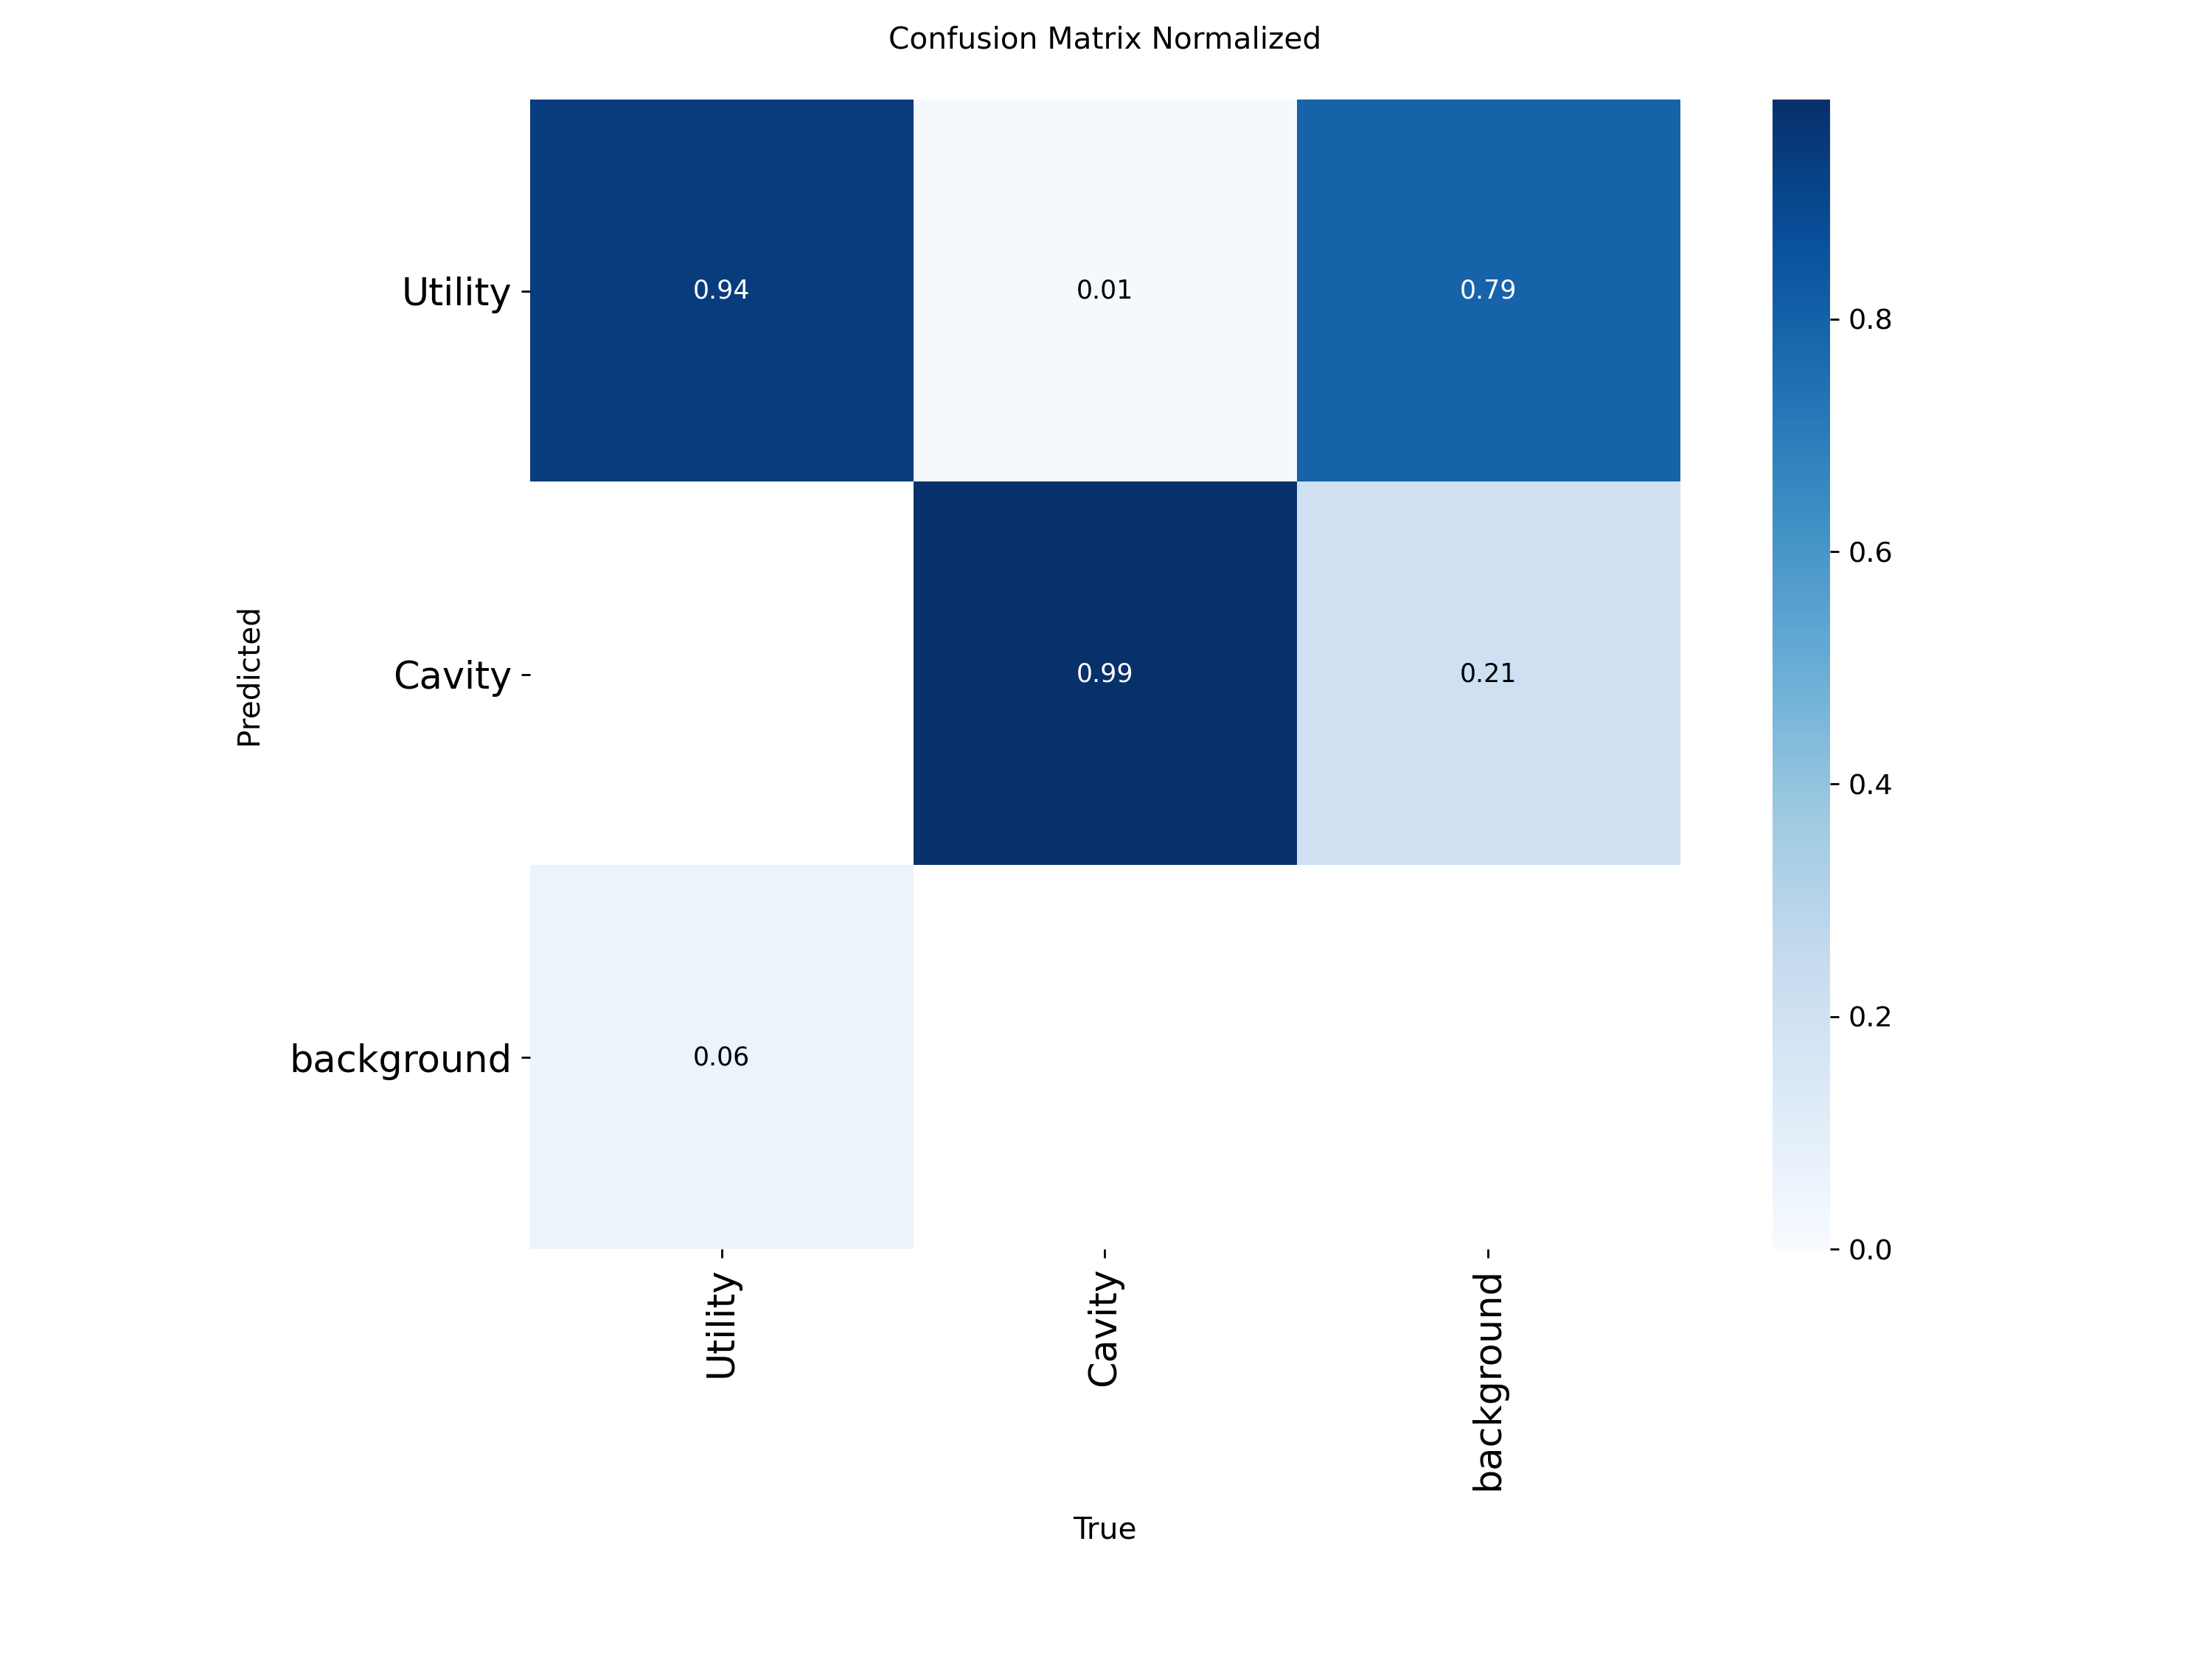


📈 2. Precision-Recall Eğrisi (Genel Başarı):
(Çizgi sağ üst köşeye ne kadar yakınsa o kadar iyi)
⚠️ PR Eğrisi bulunamadı.

📊 3. F1 Skor Grafiği:
⚠️ F1 grafiği bulunamadı.

👀 4. Modelin Gözünden RASTGELE Test Resimleri (Batch):
Toplam 3 adet tahmin dosyası arasından RASTGELE 1 tanesi seçildi:

📂 Dosya: val_batch2_pred.jpg


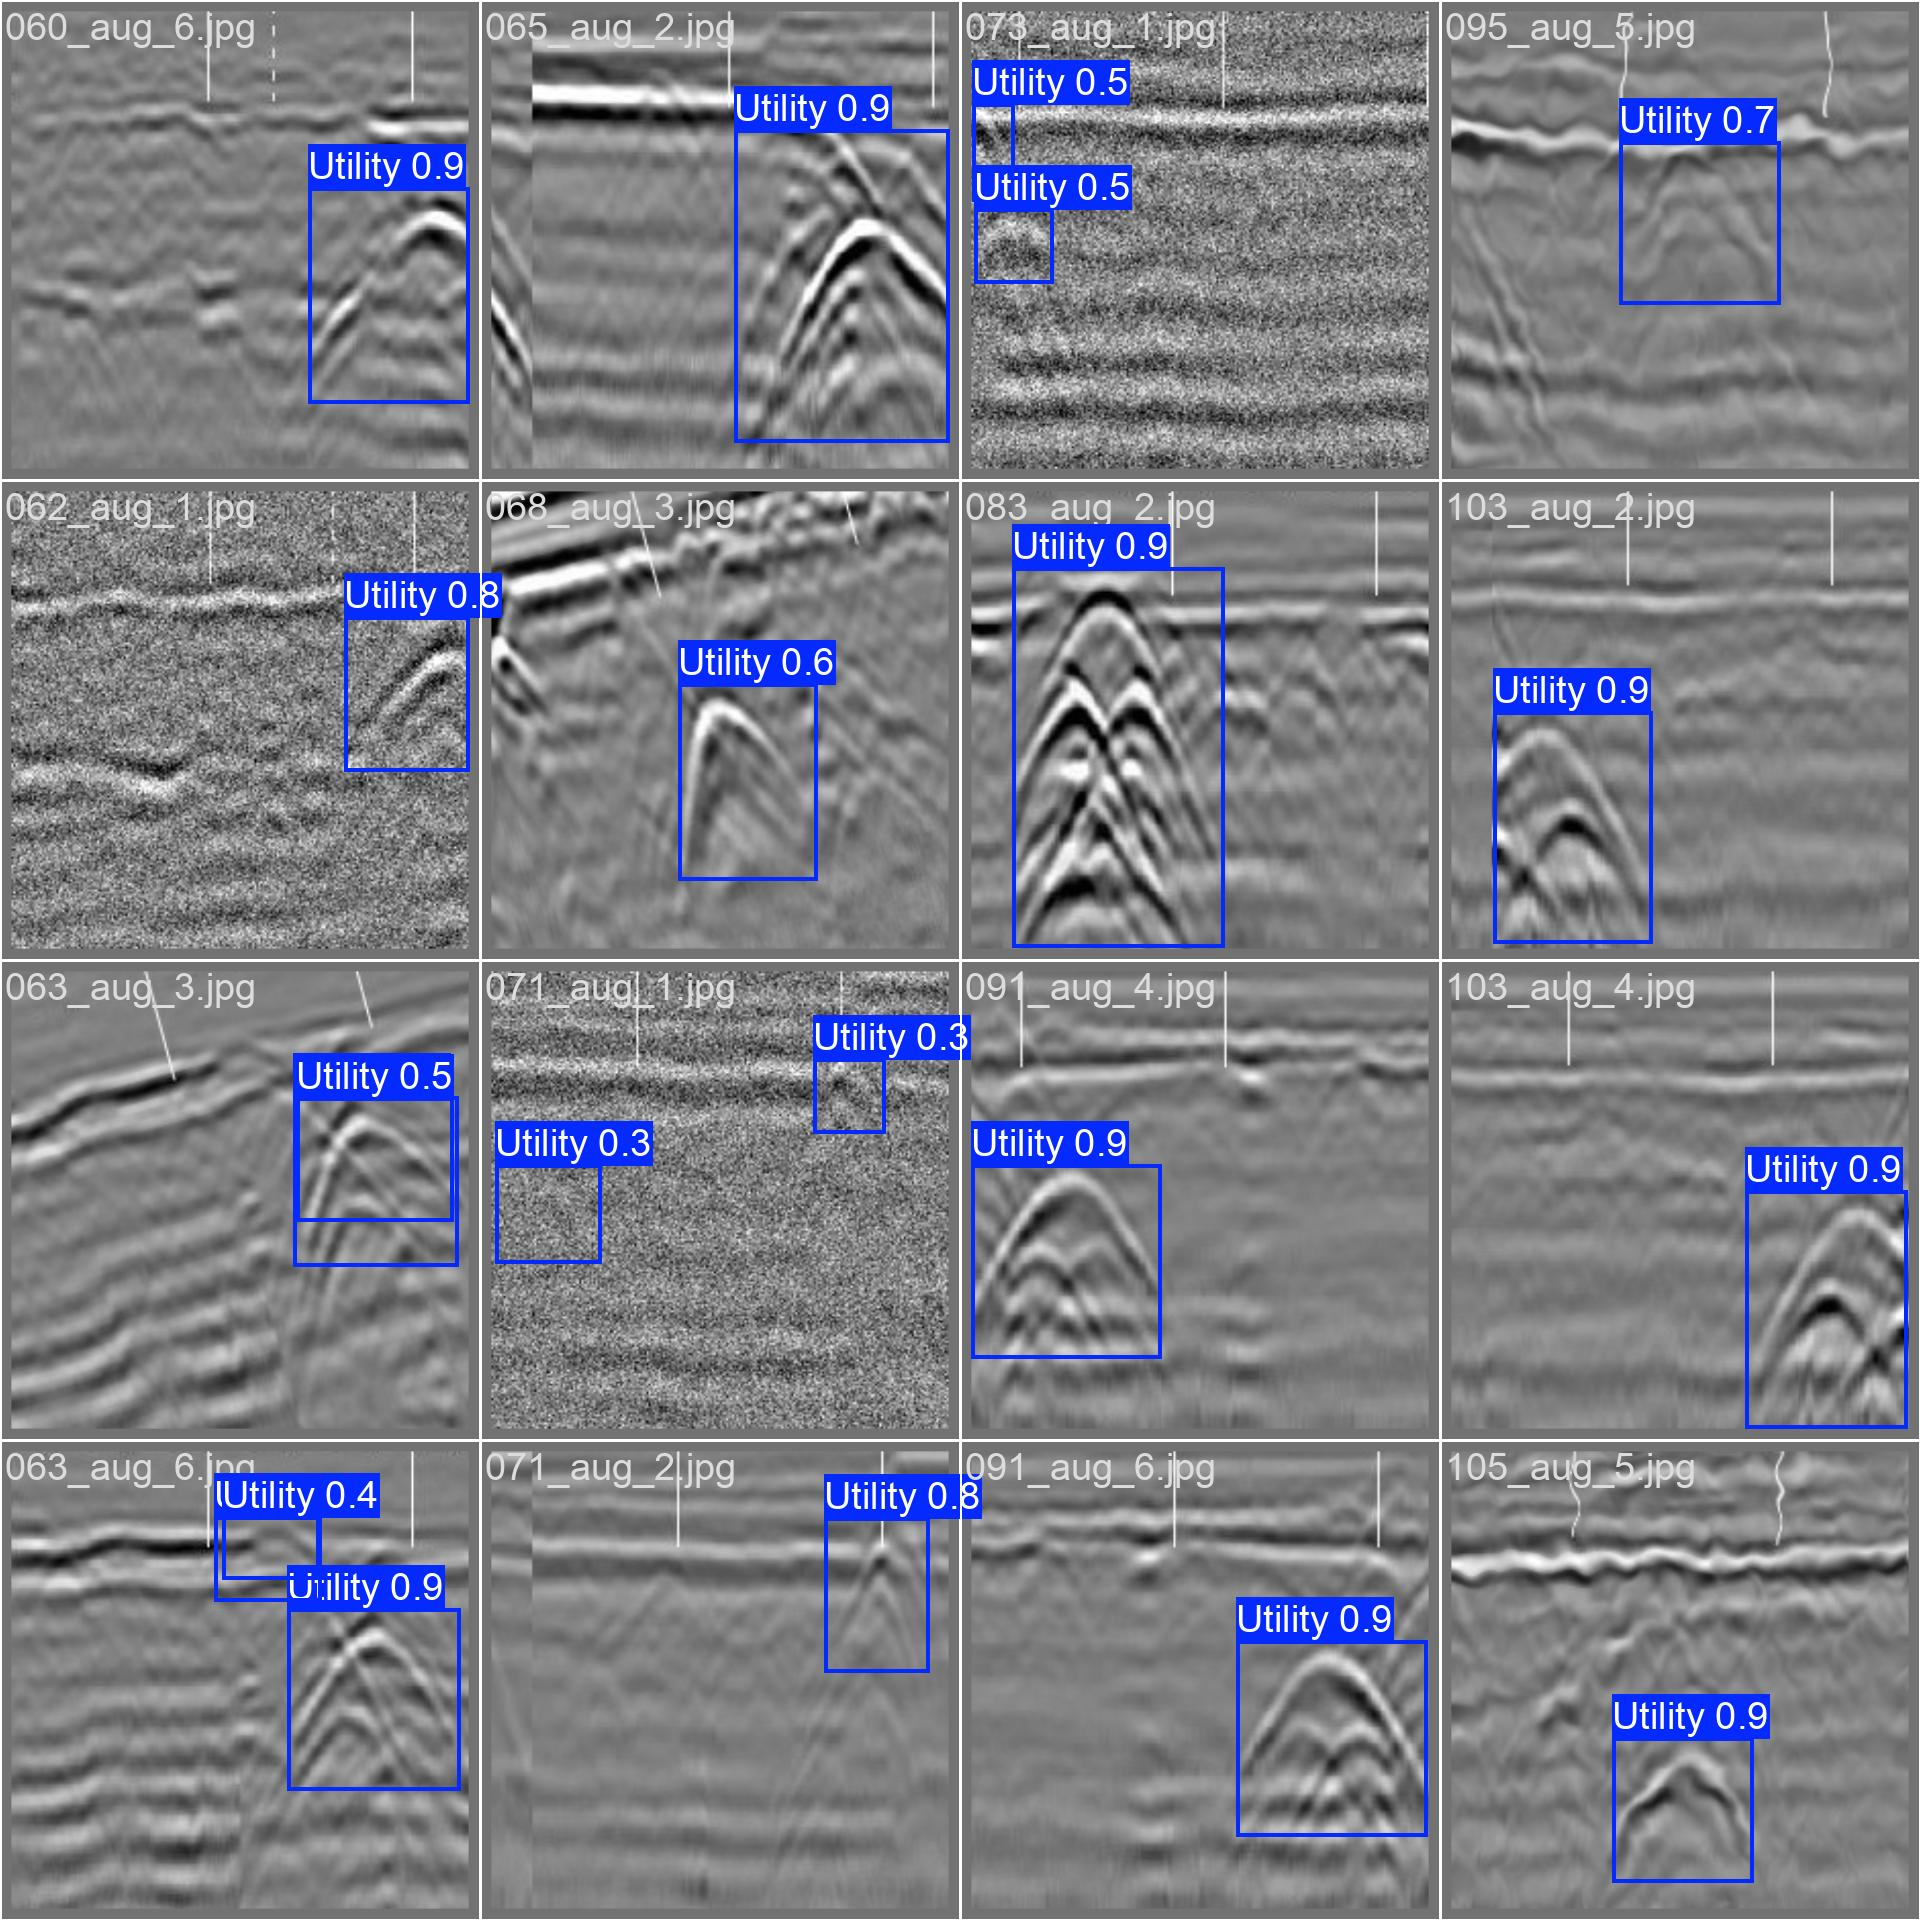

--------------------------------------------------


In [ ]:
# GRAFİKLERİ GÖSTERİYORUZ VE RESİMLER RASTGELE OLUYOR

from IPython.display import Image, display
import os
import random # Rastgelelik için gerekli kütüphane

# Test sonuçlarının olduğu klasör
test_folder = '/content/runs/detect/GPR_Test_Sonuclari'

print(f"📂 Grafikler şu klasörden çekiliyor: {test_folder}\n")

# ==========================================
# 1. TEST KARIŞIKLIK MATRİSİ (Confusion Matrix)
# ==========================================
cm_path = os.path.join(test_folder, 'confusion_matrix_normalized.png')
if not os.path.exists(cm_path):
    cm_path = os.path.join(test_folder, 'confusion_matrix.png')

print("📉 1. Karışıklık Matrisi (Test Verisi İçin):")
print("(Köşegenler ne kadar koyu maviyse o kadar iyidir)")
if os.path.exists(cm_path):
    display(Image(filename=cm_path, width=800))
else:
    print("⚠️ Karışıklık matrisi bulunamadı.")

# ==========================================
# 2. PRECISION-RECALL EĞRİSİ (PR Curve)
# ==========================================
pr_path = os.path.join(test_folder, 'PR_curve.png')
print("\n📈 2. Precision-Recall Eğrisi (Genel Başarı):")
print("(Çizgi sağ üst köşeye ne kadar yakınsa o kadar iyi)")
if os.path.exists(pr_path):
    display(Image(filename=pr_path, width=800))
else:
    print("⚠️ PR Eğrisi bulunamadı.")

# ==========================================
# 3. F1 SKOR EĞRİSİ
# ==========================================
f1_path = os.path.join(test_folder, 'F1_curve.png')
print("\n📊 3. F1 Skor Grafiği:")
if os.path.exists(f1_path):
    display(Image(filename=f1_path, width=800))
else:
    print("⚠️ F1 grafiği bulunamadı.")

# ==========================================
# 4. GÖRSEL KANITLAR (RASTGELE Tahmin Resimleri)
# ==========================================
print("\n👀 4. Modelin Gözünden RASTGELE Test Resimleri (Batch):")

# İsiminde 'pred' geçen ve '.jpg' ile biten dosyaları bul (Örn: val_batch0_pred.jpg)
pred_files = [f for f in os.listdir(test_folder) if 'pred' in f and f.endswith('.jpg')]

# Kaç tane rastgele resim göstermek istiyorsun?
num_to_show = 1

if len(pred_files) > 0:
    # Eğer klasörde istediğimizden az resim varsa, hata almamak için mevcut sayısı kadar seç
    num_to_select = min(num_to_show, len(pred_files))

    # Rastgele seçim yap
    random_preds = random.sample(pred_files, num_to_select)

    print(f"Toplam {len(pred_files)} adet tahmin dosyası arasından RASTGELE {num_to_select} tanesi seçildi:\n")

    for f in random_preds:
        print(f"📂 Dosya: {f}")
        display(Image(filename=os.path.join(test_folder, f), width=900))
        print("-" * 50) # Görseller arasına çizgi çekelim karışmasın
else:
    print("❌ Tahmin görselleri (_pred.jpg içeren dosyalar) bu klasörde bulunamadı.")